# Lesson 2: Decision Trees for House Price Prediction

## Introduction

Decision trees are a versatile machine learning model for both classification and regression tasks. In this lesson, we'll use decision trees to predict house prices based on features like location, size, and amenities.

Imagine you're a real estate agent trying to estimate the fair price of a house based on its characteristics. This is where decision trees can help. They learn a set of rules from historical data to make predictions on new, unseen houses.

Essentially, a decision tree is used to make predictions on the target variable - say price - by recursively splitting the data based on the values of the features, choosing splits that maximize the similarity of the target variable (prices) within each subset.

The result is a tree-like model of decisions and their consequences.

By the end of this lesson, you'll understand how decision trees work, how to train and interpret them, and how they compare to other models for regression tasks.

# Table of Contents

1. [Introduction](#introduction)
2. [Intuition Behind Decision Trees](#intuition-behind-decision-trees)
3. [Anatomy of a Decision Tree](#anatomy-of-a-decision-tree)
4. [Splitting Criteria Explained](#splitting-criteria-explained)
5. [Loading and Exploring the Data](#loading-and-exploring-the-data)
6. [Data Preprocessing Deep Dive](#data-preprocessing-deep-dive)
7. [Feature Engineering](#feature-engineering)
8. [Building and Training Decision Tree Models](#building-and-training-decision-tree-models)
9. [Analyzing Feature Subset Impact](#analyzing-feature-subset-impact)
10. [Model Comparison: Linear Regression, Decision Tree, Random Forest](#model-comparison-linear-regression-decision-tree-random-forest)
11. [Bias-Variance Trade-off](#bias-variance-trade-off)
12. [Model Interpretability](#model-interpretability)
13. [Advanced Techniques](#advanced-techniques)
    - [Hyperparameter Tuning](#hyperparameter-tuning)
    - [Ensemble Methods: Random Forests](#ensemble-methods-random-forests)
14. [Limitations of Decision Trees](#limitations-of-decision-trees)
15. [Ethical Considerations](#ethical-considerations) 
16. [Conclusion](#conclusion)
17. [Further Reading](#further-reading)


## Intuition Behind Decision Trees

Imagine you're trying to predict the price of a house based on its features. You might start by asking broad questions like "Is it in a desirable location?" and then progressively get more specific: "How many bedrooms does it have? What's the square footage?".

At each step, you're trying to split the houses into groups that are as similar as possible in terms of price. This is exactly how a decision tree works - it asks a series of questions about the features, each time trying to split the data into more homogeneous subsets.

### Why Choose Decision Trees for House Prices?

Decision trees are particularly well-suited for this task because of several key advantages that become apparent when comparing them to other popular algorithms:

1. **Natural Handling of Mixed Data Types**
   While algorithms like Linear Regression and Neural Networks require categorical variables to be encoded numerically, and K-Nearest Neighbors struggles with mixed data types, decision trees naturally handle our varied real estate data:
   - Numerical: Price (£180,000 to £39,750,000), square footage (274 to 15,405 sq ft)
   - Categorical: Location ("Chelsea", "Hackney"), house type ("Flat", "House", "Penthouse")
   - Ordinal: Number of bedrooms (1-10), bathrooms (1-10), receptions (1-10)

2. **No Feature Scaling Required**
   Unlike many other algorithms, decision trees work with raw values directly. 
   
   Compare this to:
   - Linear/Logistic Regression: Requires scaling to prevent features with larger values from dominating the model
   - Neural Networks: Needs normalized inputs (usually between 0-1) for stable gradient descent
   - Support Vector Machines (SVM): Highly sensitive to feature scales, requires standardization
   - K-Nearest Neighbors: Distance calculations are skewed by different scales, needs normalization

   The tree makes splits based on relative ordering, not absolute values. 
   
   For example, these splits are all equivalent to a decision tree:
   ```python
   # Original scale (Decision Tree works fine)
   if square_footage > 2000:
       predict_price = 1200000
   else:
       predict_price = 800000

   # Scaled by 1000 (needed for Neural Networks)
   if square_footage/1000 > 2:  # Same result for decision tree
       predict_price = 1200000
   else:
       predict_price = 800000

   # Standardized (needed for SVM)
   if (square_footage - mean)/std > 1.2:  # Same result for decision tree
       predict_price = 1200000
   else:
       predict_price = 800000
   ```

3. **Interpretable Decision Making**
   While algorithms like Neural Networks act as "black boxes" and Linear Regression gives abstract coefficients, decision trees create clear, actionable rules:
   ```python
   if location == "Chelsea":
       if square_footage > 2000:
           predict_price = "£2.5M"
       else:
           predict_price = "£1.2M"
   elif location == "Hackney":
       if bedrooms > 3:
           predict_price = "£950K"
       else:
           predict_price = "£650K"
   ```
   These rules are easy to explain to stakeholders, unlike trying to interpret neural network weights or SVM kernel transformations.

4. **Handling Missing Data**
   Real estate data often has missing values.
   
   While Linear Regression, Neural Networks, and SVM typically require imputation or removal of missing values, decision trees can handle this through:
   - Using a technique called surrogate splits based on correlated features
   - Making predictions even when some feature values are unknown
   - Maintaining accuracy with incomplete information

These advantages mean we can focus on understanding the relationships in our data rather than spending time on data transformation and scaling. 

Other algorithms would require significant preprocessing:
- Linear Regression: Feature scaling + encoding categoricals + handling missing values
- Neural Networks: Normalization + one-hot encoding + imputation
- SVM: Standardization + kernel selection + handling categoricals
- KNN: Feature scaling + careful handling of mixed data types

This makes decision trees an excellent choice for our house price prediction task, especially when interpretability and ease of use are priorities.

## Anatomy of a Decision Tree

A decision tree is composed of:

- Nodes: Where a feature is tested
- Edges: The outcomes of the test
- Leaves: Terminal nodes that contain the final predictions

A simplified example of a house prices prediction decision tree might look like this:

![structure of a house prices prediction decision tree](../static/house-prices-decision-tree-and-structure.png)

The tree is built by splitting the data recursively, choosing at each step the feature and split point that results in the greatest reduction in impurity or error.

## Splitting Criteria Explained:

When building a decision tree, we need a way to determine the best feature and value to split on at each node. The goal is to create child nodes that are more "pure" or homogeneous than their parent node. The method for measuring this purity and choosing the best split differs between regression and classification tasks.

### For Regression Tasks (e.g., Predicting House Prices):

In regression problems, we're trying to predict a continuous value, like house prices. The goal is to split the data in a way that minimizes the variance of the target variable within each resulting group.

The most common metric used for regression trees is the Mean Squared Error (MSE). This is the default criterion used by scikit-learn's DecisionTreeRegressor. Let's break down how this works:

Imagine you're a real estate agent with a magical ability to instantly sort houses. Your goal? To group similar houses together as efficiently as possible. This is essentially what a decision tree does, but instead of magical powers, it uses mathematics. Let's dive in!

#### Mean Squared Error (MSE)

Imagine you're playing a house price guessing game. Your goal is to guess the prices of houses as accurately as possible.

Let's say we have 5 houses, and their actual prices are:
```
House 1: £200,000
House 2: £250,000
House 3: £180,000
House 4: £220,000
House 5: £300,000
```

#### Step 1: Calculate the average price
`(200,000 + 250,000 + 180,000 + 220,000 + 300,000) / 5 = £230,000`

So, your guess for any house would be £230,000.

#### Step 2: Calculate how wrong you are for each house
```
House 1: 230,000 - 200,000 = 30,000 
House 2: 230,000 - 250,000 = -20,000
House 3: 230,000 - 180,000 = 50,000
House 4: 230,000 - 220,000 = 10,000
House 5: 230,000 - 300,000 = -70,000
```

#### Step 3: Square these differences
```
House 1: 30,000² = 900,000,000
House 2: (-20,000)² = 400,000,000
House 3: 50,000² = 2,500,000,000
House 4: 10,000² = 100,000,000
House 5: (-70,000)² = 4,900,000,000
```
#### Step 4: Add up all these squared differences
`
900,000,000 + 400,000,000 + 2,500,000,000 + 100,000,000 + 4,900,000,000 = 8,800,000,000
`
#### Step 5: Divide by the number of houses

`8,800,000,000 ÷ 5 = 1,760,000,000`

This final number, 1,760,000,000, is your Mean Squared Error (MSE).

In mathematical notation, this whole process looks like:

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y})^2$

Let's break this down:
- $n$ is the number of houses (5 in our example)
- $y_i$ is the actual price of each house
- $\hat{y}$ is your guess (the average price, £230,000 in our example)
- $\sum_{i=1}^n$ means "add up the following calculation for each house from the first to the last"
- The $i$ in $y_i$ is just a counter, going from 1 to $n$ (1 to 5 in our example)

As a python function, this would look like:
```
def calculate_mse(actual_prices, predicted_price):
    n = len(actual_prices)
    squared_errors = []
    
    for actual_price in actual_prices:
        error = predicted_price - actual_price
        squared_error = error ** 2
        squared_errors.append(squared_error)
    
    mse = sum(squared_errors) / n
    return mse

# Example usage
actual_prices = [200000, 250000, 180000, 220000, 300000]
predicted_price = sum(actual_prices) / len(actual_prices)  # Average price

mse = calculate_mse(actual_prices, predicted_price)
print(f"Mean Squared Error: {mse:.2f}")
```

### Evaluating Decision Points: Understanding Split Quality in Decision Trees

Now, when we split our houses into two groups, we want to measure if this split has made our predictions better. We do this by comparing the error before and after splitting using this formula:

$\Delta MSE = MSE_{before} - (({\text{fraction of houses in left group} \times MSE_{left}} + {\text{fraction of houses in right group} \times MSE_{right}}))$

Let's work through a real example to understand this:

Imagine we have 5 houses with these prices:
```
House 1: £200,000
House 2: £250,000
House 3: £180,000
House 4: £220,000
House 5: £300,000
```

We're considering splitting these houses based on whether they have more than 2 bedrooms:
- Left group (≤2 bedrooms): Houses 1, 3 (£200,000, £180,000)
- Right group (>2 bedrooms): Houses 2, 4, 5 (£250,000, £220,000, £300,000)

#### 1. First, let's calculate $MSE_{before}$
```
Mean price = (200k + 250k + 180k + 220k + 300k) ÷ 5 = £230,000

Squared differences from mean:
House 1: (230k - 200k)² = 900,000,000
House 2: (230k - 250k)² = 400,000,000
House 3: (230k - 180k)² = 2,500,000,000
House 4: (230k - 220k)² = 100,000,000
House 5: (230k - 300k)² = 4,900,000,000

MSE_before = (900M + 400M + 2,500M + 100M + 4,900M) ÷ 5
           = 1,760,000,000
```

#### 2. Now for the left group (≤2 bedrooms):
```
Mean price = (200k + 180k) ÷ 2 = £190,000

Squared differences:
House 1: (190k - 200k)² = 100,000,000
House 3: (190k - 180k)² = 100,000,000

MSE_left = (100M + 100M) ÷ 2 = 100,000,000
```

#### 3. And the right group (>2 bedrooms):
```
Mean price = (250k + 220k + 300k) ÷ 3 = £256,667

Squared differences:
House 2: (256.67k - 250k)² = 44,448,889
House 4: (256.67k - 220k)² = 1,344,448,889
House 5: (256.67k - 300k)² = 1,877,778,889

MSE_right = (44.45M + 1,344.45M + 1,877.78M) ÷ 3 = 1,088,892,222
```

#### 4. Finally, let's put it all together:
```
ΔMSE = MSE_before - ((2/5 × MSE_left) + (3/5 × MSE_right))

The second part calculates our weighted mean MSE after splitting:

- Left group has 2/5 of the houses, so we multiply its MSE by 2/5
- Right group has 3/5 of the houses, so we multiply its MSE by 3/5

This weighting ensures each house contributes equally to our final calculation.

Let's solve it:
     = 1,760,000,000 - ((2/5 × 100,000,000) + (3/5 × 1,088,892,222))
     = 1,760,000,000 - (40,000,000 + 653,335,333)
     = 1,760,000,000 - 693,335,333        # This is our weighted mean MSE after splitting
     = 1,066,664,667                      # ΔMSE: The reduction in prediction error

The ΔMSE (1,066,664,667) represents the difference between the original MSE and the weighted average MSE after splitting. This number is always non-negative due to a fundamental property of squared errors:

1. MSE is always positive (we're squaring differences from the mean)
2. When we split a group:
   - The parent uses one mean for all samples
   - Each subgroup uses its own mean, which minimises squared errors for that subgroup
   - The subgroup means must perform at least as well as the parent mean (due to minimising squared errors locally)
   - Therefore, the weighted average MSE of subgroups cannot exceed the parent MSE

Therefore:
- ΔMSE > 0 means the split has improved predictions (as in our case)
- ΔMSE = 0 means the split makes no difference
- ΔMSE < 0 is mathematically impossible
```

The larger the ΔMSE, the more effective the split is at creating subgroups with similar house prices. Our large ΔMSE of 1,066,664,667 indicates this is a very effective split.

### A simplified decision tree algorithm in python:
In practise, you'd use a library like `sklearn` to build a decision tree, but here's a simplified version in python to illustrate the concept:

```python
import numpy as np
from typing import List, Dict, Any

class House:
    def __init__(self, features: Dict[str, float], price: float):
        self.features = features
        self.price = price

def find_best_split(houses: List[House], feature: str) -> tuple:
    values = sorted(set(house.features[feature] for house in houses))
    
    best_split = None
    best_delta_mse = float('-inf')

    for i in range(len(values) - 1):
        split_point = (values[i] + values[i+1]) / 2
        left = [h for h in houses if h.features[feature] < split_point]
        right = [h for h in houses if h.features[feature] >= split_point]

        if len(left) == 0 or len(right) == 0:
            continue

        mse_before = np.var([h.price for h in houses])
        mse_left = np.var([h.price for h in left])
        mse_right = np.var([h.price for h in right])

        delta_mse = mse_before - (len(left)/len(houses) * mse_left + len(right)/len(houses) * mse_right)

        if delta_mse > best_delta_mse:
            best_delta_mse = delta_mse
            best_split = split_point

    return best_split, best_delta_mse

def build_tree(houses: List[House], depth: int = 0, max_depth: int = 3) -> Dict[str, Any]:
    if depth == max_depth or len(houses) < 2:
        return {'type': 'leaf', 'value': np.mean([h.price for h in houses])}

    features = houses[0].features.keys()
    best_feature = None
    best_split = None
    best_delta_mse = float('-inf')

    for feature in features:
        split, delta_mse = find_best_split(houses, feature)
        if delta_mse > best_delta_mse:
            best_feature = feature
            best_split = split
            best_delta_mse = delta_mse

    if best_feature is None:
        return {'type': 'leaf', 'value': np.mean([h.price for h in houses])}

    left = [h for h in houses if h.features[best_feature] < best_split]
    right = [h for h in houses if h.features[best_feature] >= best_split]

    return {
        'type': 'node',
        'feature': best_feature,
        'split': best_split,
        'left': build_tree(left, depth + 1, max_depth),
        'right': build_tree(right, depth + 1, max_depth)
    }

def predict(tree: Dict[str, Any], house: House) -> float:
    if tree['type'] == 'leaf':
        return tree['value']
    
    if house.features[tree['feature']] < tree['split']:
        return predict(tree['left'], house)
    else:
        return predict(tree['right'], house)

# Example usage
houses = [
    House({'bedrooms': 2, 'area': 80, 'distance_to_tube': 15}, 200),
    House({'bedrooms': 3, 'area': 120, 'distance_to_tube': 10}, 250),
    House({'bedrooms': 2, 'area': 75, 'distance_to_tube': 20}, 180),
    House({'bedrooms': 3, 'area': 100, 'distance_to_tube': 5}, 220),
    House({'bedrooms': 4, 'area': 150, 'distance_to_tube': 2}, 300),
    House({'bedrooms': 3, 'area': 110, 'distance_to_tube': 12}, 240),
    House({'bedrooms': 2, 'area': 70, 'distance_to_tube': 25}, 190),
    House({'bedrooms': 4, 'area': 140, 'distance_to_tube': 8}, 280),
    House({'bedrooms': 3, 'area': 130, 'distance_to_tube': 6}, 260),
    House({'bedrooms': 2, 'area': 85, 'distance_to_tube': 18}, 210)
]

tree = build_tree(houses)

def print_tree(node, indent=""):
    if node['type'] == 'leaf':
        print(f"{indent}Predict price: £{node['value']:.2f}k")
    else:
        print(f"{indent}{node['feature']} < {node['split']:.2f}")
        print(f"{indent}If True:")
        print_tree(node['left'], indent + "  ")
        print(f"{indent}If False:")
        print_tree(node['right'], indent + "  ")

print_tree(tree)

# Test prediction
new_house = House({'bedrooms': 3, 'area': 105, 'distance_to_tube': 7}, 0)  # price set to 0 as it's unknown
predicted_price = predict(tree, new_house)
print(f"\nPredicted price for new house: £{predicted_price:.2f}k")

```

### Mean Squared Error (MSE) vs Mean Absolute Error (MAE)

When evaluating our decision tree's performance, we need to understand the difference between training metrics and evaluation metrics.

![mean-squared-error-mean-absolute-error](../static/mean-squared-error-mean-absolute-error.png)

Our decision tree algorithm uses MSE as the splitting criterion but measures final performance using MAE. 

Here's why we use these different metrics:

1. **Mean Squared Error (MSE)**
   ##### Calculation: (predicted house price - actual house price)². 
   
   For example, if we predict £200,000 for a house that's actually worth £150,000, the error is £50,000 and MSE is £50,000² = £2.5 billion
   
   ##### Visualisation 
   
   If we plot how wrong our house price prediction is (like £50,000 too high or -£50,000 too low) on the x-axis, and plot the squared value of this error (like £2.5 billion) on the y-axis, we get a U-shaped curve. Because MSE squares the errors, it gives more weight to data points that are further from the mean, making it a good measure of variance within groups
   
   ##### Purpose

   The decision tree uses MSE to decide where to split data because minimizing MSE is equivalent to minimizing the variance within each group, which helps find splits that create distinct groups of house prices

2. **Mean Absolute Error (MAE)**:
   ##### Calculation: |predicted house price - actual house price| 
   
   Using the same example, if we predict £200,000 for a £150,000 house, MAE is |£50,000| = £50,000
   
   ##### Visualisation 
   If we plot how wrong our prediction is on the x-axis (like £50,000 too high or -£50,000 too low), and plot the absolute value of this error on the y-axis (always positive, like £50,000), we get a V-shaped curve
   
   ##### Purpose 
   We use MAE to evaluate our final model because it's easier to understand - it directly tells us how many pounds we're off by on average

\
The decision tree uses MSE's mathematical properties to make splitting decisions, but we report MAE because "off by £50,000 on average" makes more sense than "off by £2.5 billion squared pounds"!

Here's an example to illustrate the difference:
```python
from sklearn.metrics import mean_squared_error, mean_absolute_error 
y_true = [100, 200, 300]
y_pred = [90, 210, 320]

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
```

Output:
```
Mean Squared Error: 200.00
Mean Absolute Error: 13.33
```

In this example, MSE and MAE provide different views of the error. MSE is more sensitive to the larger error (20) in the third prediction, while MAE treats all errors equally.

For house price prediction, MAE is often preferred as it directly translates to the average error in pounds. However, MSE is still commonly used as a splitting criterion in decision trees because minimizing MSE helps create groups with similar target values by minimizing the variance within each group.

### For Classification Tasks (e.g., Predicting if a House Will Sell Quickly):

In classification problems, we're trying to predict a categorical outcome, like whether a house will sell quickly or not. The goal is to split the data in a way that maximizes the "purity" of the classes within each resulting group.

There are several metrics used for classification trees, with the most common being Gini Impurity and Entropy. These metrics measure how mixed the classes are within a group.

Let's explore how different distributions of marbles affect our measures of impurity. We will then explore information gain, a measure used in conjuction with impurity metrics to decide how to split the data.

We'll use red marbles to represent quick-selling houses and blue marbles for slow-selling houses.

#### 1. Gini Impurity:
   Gini Impurity measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution in the set.

   Formula: $Gini = 1 - \sum_{i=1}^{c} (p_i)^2$

   Where $c$ is the number of classes and $p_i$ is the probability of an object being classified to a particular class.

   Let's compare three scenarios:

```
   a) 10 marbles: 7 red, 3 blue
      Fraction of red = 7/10 = 0.7
      Fraction of blue = 3/10 = 0.3
      
      Gini = 1 - (0.7² + 0.3²) = 1 - (0.49 + 0.09) = 1 - 0.58 = 0.42
```

```
   b) 10 marbles: 5 red, 5 blue
      Fraction of red = 5/10 = 0.5
      Fraction of blue = 5/10 = 0.5
      
      Gini = 1 - (0.5² + 0.5²) = 1 - (0.25 + 0.25) = 1 - 0.5 = 0.5
      most impure set
```

```
   c) 10 marbles: 9 red, 1 blue
      Fraction of red = 9/10 = 0.9
      Fraction of blue = 1/10 = 0.1
      
      Gini = 1 - (0.9² + 0.1²) = 1 - (0.81 + 0.01) = 1 - 0.82 = 0.18
      purest set
```

**The lower the Gini Impurity, the purer the set. Scenario (c) has the lowest Gini Impurity, indicating it's the most homogeneous.**

#### 2. Entropy:

Entropy is another measure of impurity, based on the concept of information theory. It quantifies the amount of uncertainty or randomness in the data.

$Entropy = -\sum_{i=1}^{c} p_i \log_2(p_i)$

Where $c$ is the number of classes and $p_i$ is the probability of an object being classified to a particular class.

Imagine you're playing a guessing game with marbles in a bag. Entropy measures how surprised you'd be when pulling out a marble. The more mixed the colours, the more surprised you might be, and the higher the entropy.

#### Let's use our marble scenarios:

10 marbles: 7 red, 3 blue

To calculate entropy, we follow these steps:

1. Calculate the fraction of each colour:
```
   Red: 7/10 = 0.7
   Blue: 3/10 = 0.3
```

2. For each colour, multiply its fraction by the log2 of its fraction:   
```
   Red: 0.7 × log2(0.7) = 0.7 × -0.5146 = -0.360
   Blue: 0.3 × log2(0.3) = 0.3 × -1.7370 = -0.5211
```

3. Sum these values and negate the result:
```
Entropy = -(-0.3602 + -0.5211) = 0.8813
```

#### Let's do this for all scenarios:

a) 7 red, 3 blue
```
   Entropy = 0.8813
```
b) 5 red, 5 blue
```
   Red: 0.5 × log2(0.5) = 0.5 × -1 = -0.5
   Blue: 0.5 × log2(0.5) = 0.5 × -1 = -0.5
   Entropy = -(-0.5 + -0.5) = 1

Highest entropy, least predictable set
```

c) 9 red, 1 blue
```
   Red: 0.9 × log2(0.9) = 0.9 × -0.1520 = -0.1368
   Blue: 0.1 × log2(0.1) = 0.1 × -3.3219 = -0.3322
   Entropy = -(-0.1368 + -0.3322) = 0.4690

Lowest entropy, most predictable set
```

Lower entropy means less surprise or uncertainty. Scenario (c) has the lowest entropy, confirming it's the most predictable (or least mixed) set.

In Python, we could calculate entropy like this:

```python
import math

def calculate_entropy(marbles):
    total = sum(marbles.values())
    entropy = 0
    for count in marbles.values():
        fraction = count / total
        entropy -= fraction * math.log2(fraction)
    return entropy

# Example usage
scenario_a = {"red": 7, "blue": 3}
entropy_a = calculate_entropy(scenario_a)
print(f"Entropy for scenario A: {entropy_a:.4f}")
```

#### 3. Information Gain:

Information Gain measures how much a split improves our ability to predict the outcome. It's a way of measuring how much better you've sorted your marbles after dividing them into groups.

Formula: $IG(T, a) = I(T) - \sum_{v \in values(a)} \frac{|T_v|}{|T|} I(T_v)$

Where:
- $T$ is the parent set
- $a$ is the attribute on which the split is made
- $v$ represents each possible value of attribute $a$
- $T_v$ is the subset of $T$ for which attribute $a$ has value $v$
- $I(T)$ is the impurity measure (Entropy or Gini) of set $T$


#### Let's use a scenario to calculate Information Gain:

We have 20 marbles total, and we're considering splitting them based on a feature (e.g., house size: small or large).
```
Before split: 12 red, 8 blue
```

Step 1: Calculate the entropy before the split
```
Entropy_before = 0.9710 (calculated as we did above)
```

After split:
```
Small houses: 8 red, 2 blue
Large houses: 4 red, 6 blue
```
Step 2: Calculate entropy for each group after the split
Entropy_small = 0.7219 (calculated for 8 red, 2 blue)
Entropy_large = 0.9710 (calculated for 4 red, 6 blue)

Step 3: Calculate the weighted average of the split entropies
```
Weight_small = 10/20 = 0.5 (half the marbles are in small houses)
Weight_large = 10/20 = 0.5 (half the marbles are in large houses)
Weighted_entropy_after = (0.5 × 0.7219) + (0.5 × 0.9710) = 0.8465
```

Step 4: Calculate Information Gain
```
Information Gain = Entropy_before - Weighted_entropy_after
                 = 0.9710 - 0.8465
                 = 0.1245
```

This positive Information Gain indicates that the split has improved our ability to predict marble colours (or in our house analogy, to predict if a house will sell quickly).

#### In Python, we could calculate Information Gain like this:

```python
def calculate_information_gain(before, after):
    entropy_before = calculate_entropy(before)
    
    total_after = sum(sum(group.values()) for group in after)
    weighted_entropy_after = sum(
        (sum(group.values()) / total_after) * calculate_entropy(group)
        for group in after
    )
    
    return entropy_before - weighted_entropy_after

# Example usage
before_split = {"red": 12, "blue": 8}
after_split = [
    {"red": 8, "blue": 2},  # Small houses
    {"red": 4, "blue": 6}   # Large houses
]

info_gain = calculate_information_gain(before_split, after_split)
print(f"Information Gain: {info_gain:.4f}")
```

#### Comparison: Splits with Different Information Gains

The decision tree algorithm always chooses the split that provides the most Information Gain. 

Let's consider two potential splits of our 20 marbles:

1. Split by house size (small vs large):
   - Small houses: 8 red, 2 blue
   - Large houses: 4 red, 6 blue
   - Information Gain: 0.1245

2. Split by garage presence:
   - Houses with garage: 6 red, 4 blue
   - Houses without garage: 6 red, 4 blue
   - Information Gain: 0

The algorithm would choose the split by house size because it provides more Information Gain. 

Zero Information Gain occurs when a split doesn't change the distribution of the target variable (in this case, marble colours or house selling speed). This happens when the proportions in each resulting group are identical to the proportions in the parent group.

In practice, splits with exactly zero Information Gain are rare. More commonly, you'll see splits with varying degrees of positive Information Gain, and the algorithm will choose the one with the highest value.

Features that provide little or no Information Gain are typically less valuable for prediction and should be considered for removal from the model. Eliminating these low-impact features can simplify the model, potentially improving its generalization ability and computational efficiency without significantly compromising predictive performance.

## Theory Conclusion

Now that we've explored the key concepts behind decision trees, let's summarize the main points and how they apply to our house price prediction task:

1. **Regression Trees vs Classification Trees**: 
   For our house price prediction problem, we're using regression trees. Unlike classification trees which use metrics like Gini impurity or entropy, regression trees aim to minimize the variance in the target variable (house prices) within each node.

2. **Splitting Criterion**: 
   In regression trees, the splitting criterion is typically the reduction in Mean Squared Error (MSE) or equivalently, the reduction in variance. At each node, the algorithm chooses the feature and split point that maximizes this reduction:

   $\Delta MSE = MSE_{parent} - (w_{left} * MSE_{left} + w_{right} * MSE_{right})$

   Where $w_{left}$ and $w_{right}$ are the proportions of samples in the left and right child nodes.

3. **Recursive Splitting**: 
   The tree is built by recursively applying this splitting process, creating a hierarchy of decision rules. This continues until a stopping condition is met, such as a maximum tree depth or a minimum number of samples per leaf.

4. **Prediction**: 
   To predict the price of a new house, we follow the decision rules from the root to a leaf node. The prediction is typically the mean price of all houses in that leaf node.

5. **Interpretability**: 
   One of the key advantages of decision trees is their interpretability. We can visualize the tree and follow its decision path, which provides insights into which features are most important for predicting house prices.

6. **Bias-Variance Trade-off**: 
   Deeper trees can capture more complex relationships in the data but risk overfitting (high variance). Shallower trees are more generalizable but might oversimplify the problem (high bias). Finding the right balance is crucial for optimal performance.

7. **Feature Importance**: 
   Decision trees naturally perform feature selection. Features that appear higher in the tree or are used in more splits are generally more important for prediction.

8. **Handling Non-linearity**: 
   Unlike linear regression, decision trees can capture non-linear relationships between features and the target variable, which is often the case in real estate markets.

9. **Limitations**: 
   Decision trees can be unstable (small changes in data can result in very different trees) and may struggle with smooth, linear relationships. These limitations are often addressed by ensemble methods like Random Forests.

As we move forward to apply these concepts to our London housing dataset, keep in mind that while the theory provides the foundation, the real insights often come from experimenting with the data, tuning the model, and interpreting the results in the context of the problem at hand.

In the next sections, we'll see how these theoretical concepts translate into practical implementation using Python and scikit-learn, and how we can use decision trees to gain insights into the London housing market.




## Practical Application on London Housing Data

In this practical, we will explore using decision trees to predict housing prices in London. We'll walk through the key steps of loading data, exploratory analysis, data preprocessing, model training and evaluation, and drawing insights.

## Load imports


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

np.random.seed(42)

## Load the dataset and display the data table

Lets print the data table and have a look at the data.

We'll see it has 11 columns and 3480 rows. The first column is the row number which will need to be removed. The second column is the price of each house and the remaining columns are features of each house.

The initial features are:
- Property Name
- Price
- House Type
- Area in sq ft
- No. of Bedrooms
- No. of Bathrooms
- No. of Receptions
- Location
- City/County
- Postal Code

In [92]:
def load_data(file_path):
    """
    Load data with proper NaN handling and verification
    """
    # Read CSV with na_values parameter to properly interpret NaN values
    df = pd.read_csv(file_path, na_values=['NaN', 'nan', 'NAN', '', 'null', 'NULL'])
    
    return df

# Load the data
df = load_data("../data/London_Housing_Data.csv")

# Display first 10 rows with headers in a more readable format
pd.set_option('display.max_columns', None)  # Show all columns
print("\nFirst 10 rows of the dataset with headers:")
display(df.head(10))

# Remove unnamed column with row numbers
df = df.drop(columns=['Unnamed: 0'])
print("\nDataset shape after removing unnamed column:", df.shape)
display(df.head(10))

# Let's verify the Location column specifically
print("\nUnique values in Location column:")
display(df['Location'].value_counts(dropna=False).head())


First 10 rows of the dataset with headers:


,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
5,5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,NaN,London,W2 3EA
6,6,Alfriston Road,1475000,House,1548,4,4,4,NaN,London,SW11 6NW
7,7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF
8,8,Adam & Eve Mews,2500000,House,1308,3,3,3,NaN,London,W8 6UG
9,9,Hornton Street,925000,Flat / Apartment,646,2,2,2,NaN,London,W8 4NT



Dataset shape after removing unnamed column: (3480, 10)


,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL
5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,NaN,London,W2 3EA
6,Alfriston Road,1475000,House,1548,4,4,4,NaN,London,SW11 6NW
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF
8,Adam & Eve Mews,2500000,House,1308,3,3,3,NaN,London,W8 6UG
9,Hornton Street,925000,Flat / Apartment,646,2,2,2,NaN,London,W8 4NT



Unique values in Location column:


NaN           962
Putney         96
Barnes         71
Wandsworth     70
Wimbledon      68
Name: Location, dtype: int64

## Exploratory data analysis (EDA)

Let's explore the data to get a better understanding of it, identify any issues and get some insights that will help us prepare it for model training.


Statistical Summary:
              Price  Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
count      3,480.00       3,480.00         3,480.00          3,480.00   
mean   1,864,172.54       1,712.97             3.10              3.10   
std    2,267,282.96       1,364.26             1.52              1.52   
min      180,000.00         274.00             0.00              0.00   
25%      750,000.00         834.00             2.00              2.00   
50%    1,220,000.00       1,310.00             3.00              3.00   
75%    2,150,000.00       2,157.25             4.00              4.00   
max   39,750,000.00      15,405.00            10.00             10.00   

       No. of Receptions  
count           3,480.00  
mean                3.10  
std                 1.52  
min                 0.00  
25%                 2.00  
50%                 3.00  
75%                 4.00  
max                10.00  


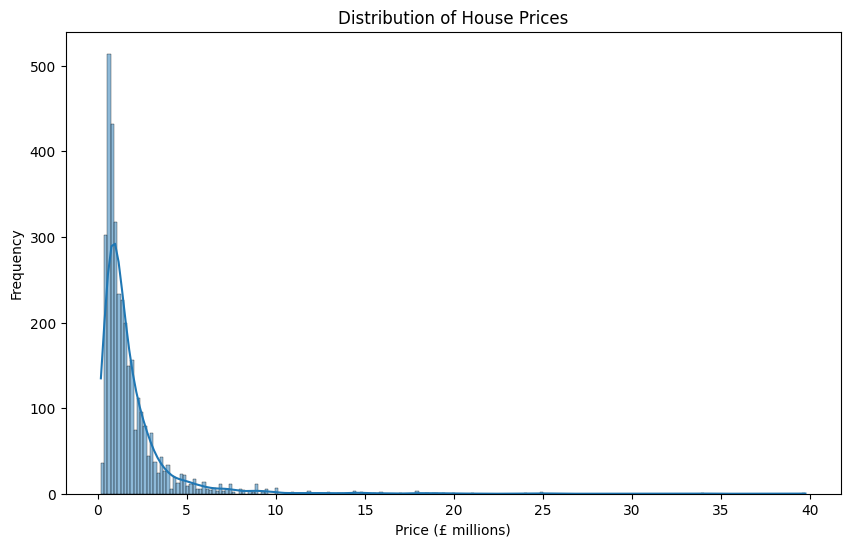

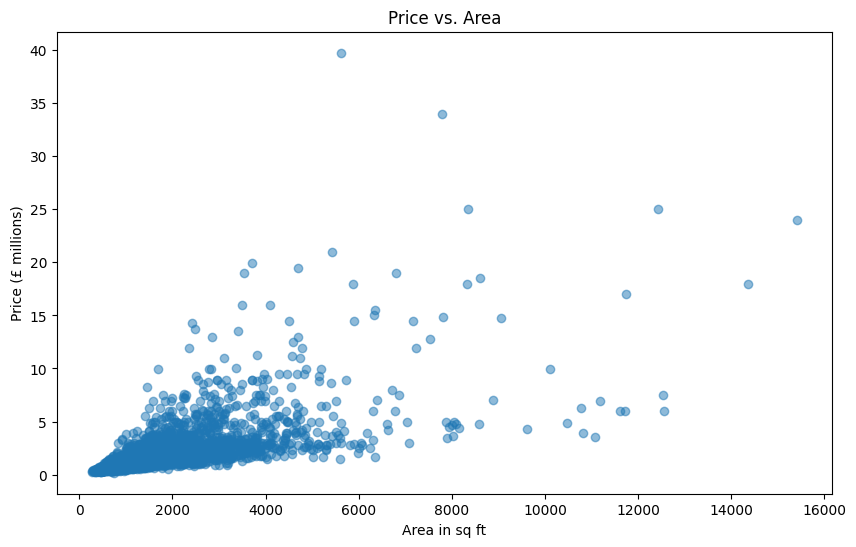

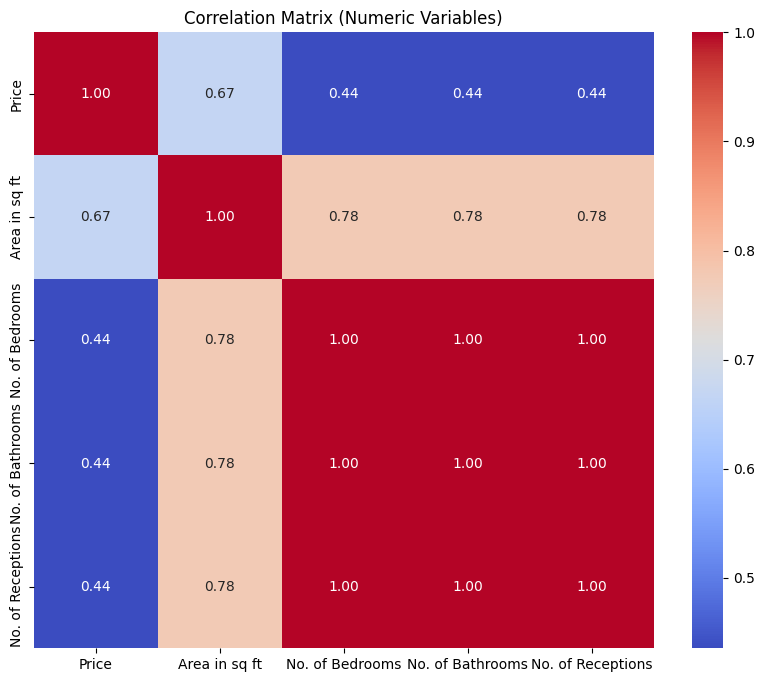


Correlation Matrix (Numeric Variables):
                   Price  Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
Price               1.00           0.67             0.44              0.44   
Area in sq ft       0.67           1.00             0.78              0.78   
No. of Bedrooms     0.44           0.78             1.00              1.00   
No. of Bathrooms    0.44           0.78             1.00              1.00   
No. of Receptions   0.44           0.78             1.00              1.00   

                   No. of Receptions  
Price                           0.44  
Area in sq ft                   0.78  
No. of Bedrooms                 1.00  
No. of Bathrooms                1.00  
No. of Receptions               1.00  

Unique Values Analysis:

House Type:
- Unique values: 8
- Null values: 0
- Unique ratio: 0.23% of total rows
- Most common values:
Flat / Apartment    1565
House               1430
New development      357
Name: House Type, dtype: int64

Location:
- Uniqu

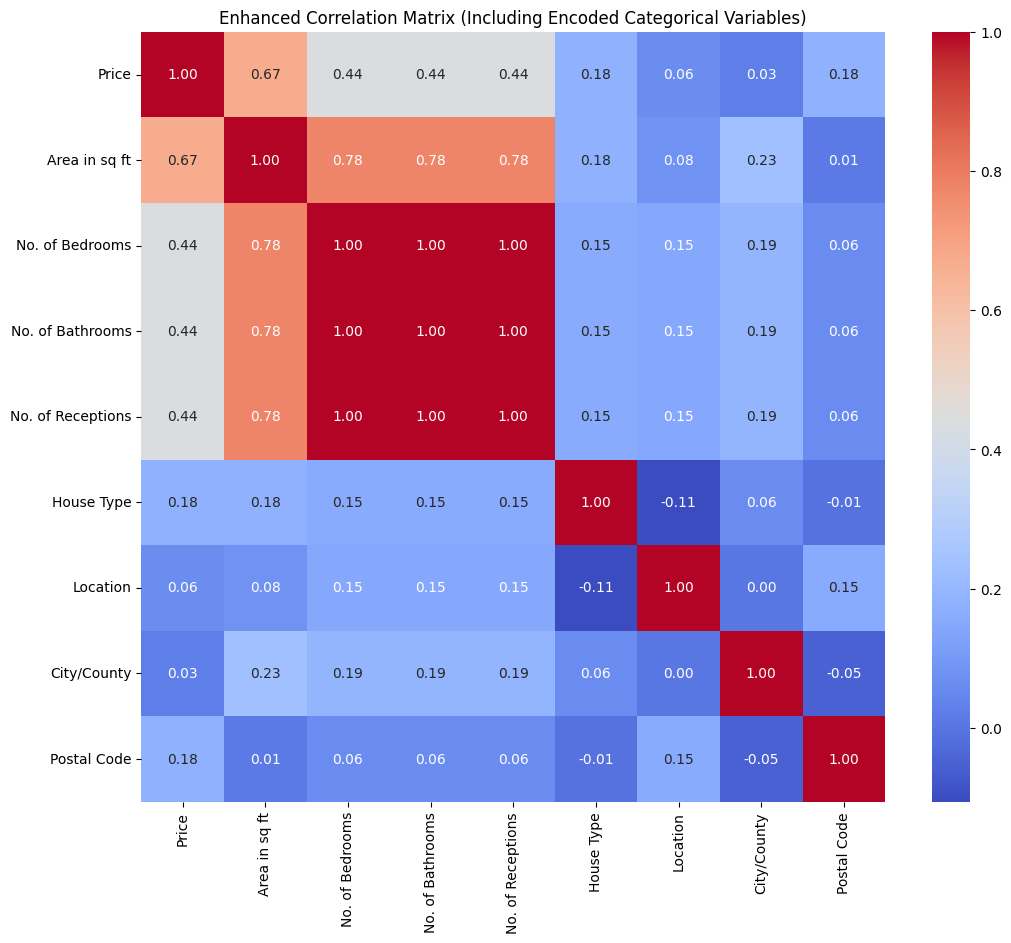


Enhanced Correlation Matrix (Including Encoded Categorical Variables):
                   Price  Area in sq ft  No. of Bedrooms  No. of Bathrooms  \
Price               1.00           0.67             0.44              0.44   
Area in sq ft       0.67           1.00             0.78              0.78   
No. of Bedrooms     0.44           0.78             1.00              1.00   
No. of Bathrooms    0.44           0.78             1.00              1.00   
No. of Receptions   0.44           0.78             1.00              1.00   
House Type          0.18           0.18             0.15              0.15   
Location            0.06           0.08             0.15              0.15   
City/County         0.03           0.23             0.19              0.19   
Postal Code         0.18           0.01             0.06              0.06   

                   No. of Receptions  House Type  Location  City/County  \
Price                           0.44        0.18      0.06         0.03 

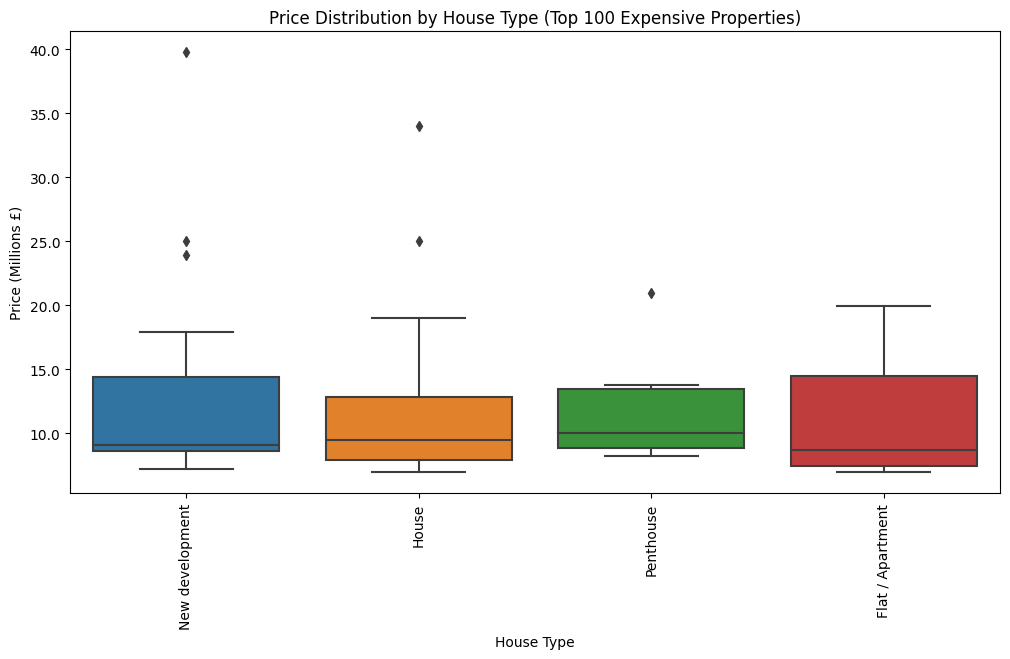

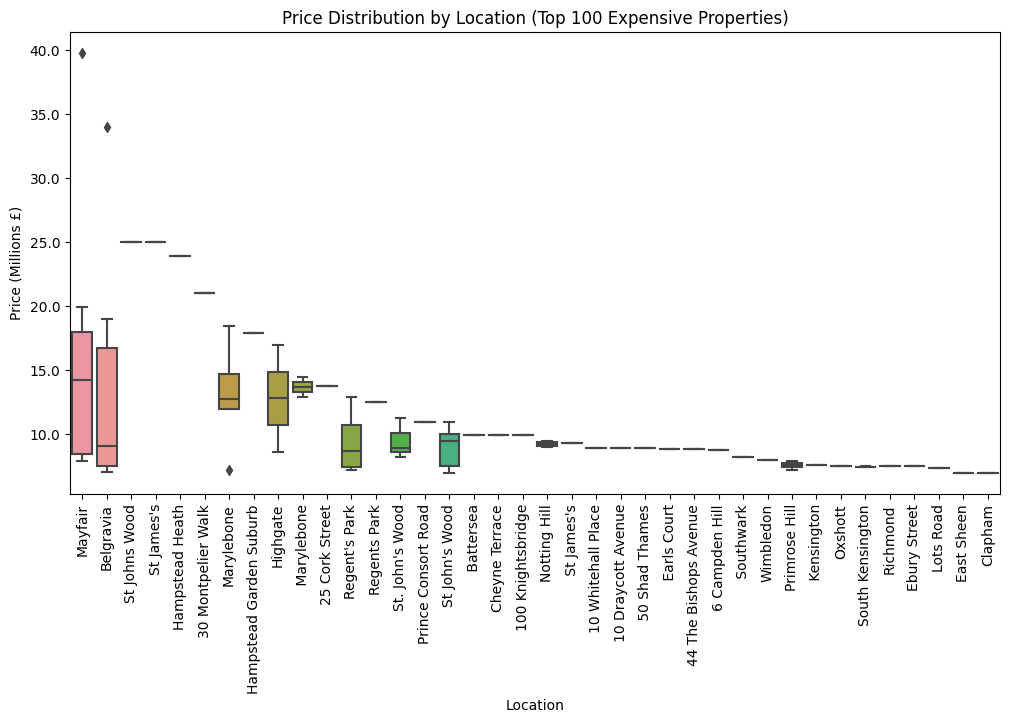

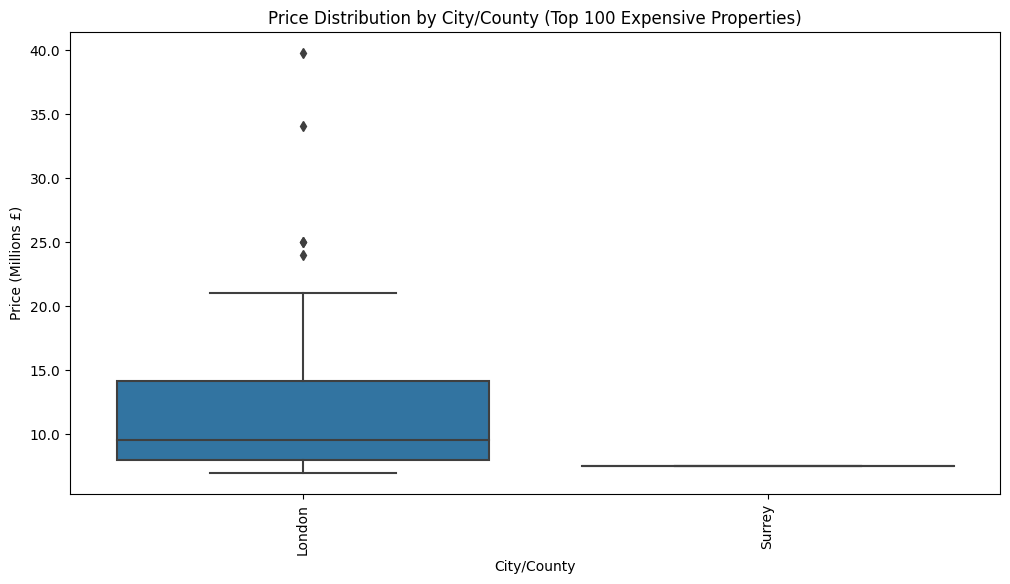

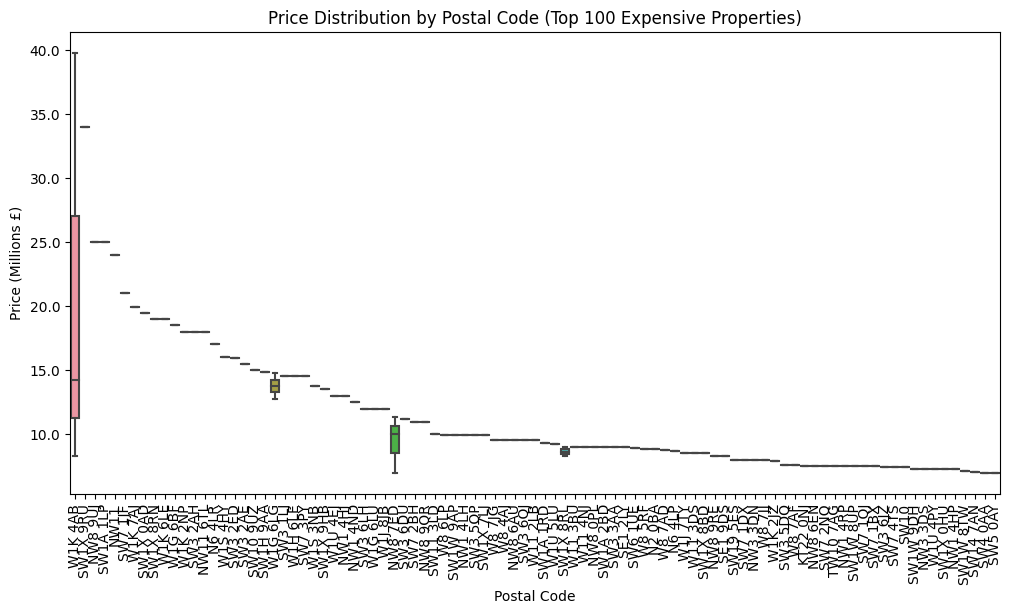

In [94]:
# Set pandas display format to be more human readable with 2 decimal places
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))


def explore_data(df):
    print("\nStatistical Summary:")
    print(df.describe())
    
    plt.figure(figsize=(10,6))
    sns.histplot(df['Price']/1000000, kde=True)
    plt.title('Distribution of House Prices')
    plt.xlabel('Price (£ millions)')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.scatter(df['Area in sq ft'], df['Price']/1000000, alpha=0.5)
    plt.title('Price vs. Area')
    plt.xlabel('Area in sq ft')
    plt.ylabel('Price (£ millions)')
    plt.show()
    
    # Normal correlation matrix (numeric variables only)
    numeric_cols = ['Price', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']
    corr_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix (Numeric Variables)')
    plt.show()

    print("\nCorrelation Matrix (Numeric Variables):")
    print(corr_matrix)

    print("\nUnique Values Analysis:")
    categorical_and_discrete = ['House Type', 'Location', 'City/County', 'Postal Code', 
                              'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']
    
    total_rows = len(df)
    for col in categorical_and_discrete:
        unique_count = df[col].nunique()
        null_count = df[col].isnull().sum()
        unique_ratio = (unique_count / total_rows) * 100
        
        print(f"\n{col}:")
        print(f"- Unique values: {unique_count}")
        print(f"- Null values: {null_count}")
        print(f"- Unique ratio: {unique_ratio:.2f}% of total rows")
        print(f"- Most common values:")
        print(df[col].value_counts().head(3))

    # Enhanced correlation matrix (including encoded categorical variables)
    categorical_cols = ['House Type', 'Location', 'City/County', 'Postal Code']
    df_encoded = df.copy()
    le = LabelEncoder()
    for col in categorical_cols:
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    enhanced_corr_columns = numeric_cols + categorical_cols
    enhanced_corr_matrix = df_encoded[enhanced_corr_columns].corr()

    plt.figure(figsize=(12,10))
    sns.heatmap(enhanced_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Enhanced Correlation Matrix (Including Encoded Categorical Variables)')
    plt.show()

    print("\nEnhanced Correlation Matrix (Including Encoded Categorical Variables):")
    print(enhanced_corr_matrix)

    # Analyze categorical variables
    for col in categorical_cols:
        print(f"\nTop 5 {col} by Average Price:")
        print(df.groupby(col)['Price'].mean().sort_values(ascending=False).head())
        
    # Additional visualizations for categorical variables
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=col, y='Price', data=df.sort_values('Price', ascending=False).head(100))
        plt.xticks(rotation=90)
        plt.title(f'Price Distribution by {col} (Top 100 Expensive Properties)')
        plt.ylabel('Price (Millions £)')
        # Convert y-axis values to millions and set fixed locator
        ax = plt.gca()
        yticks = ax.get_yticks()
        ax.yaxis.set_major_locator(plt.FixedLocator(yticks))
        ax.set_yticklabels(['{:.1f}'.format(x/1000000) for x in yticks])
        plt.show()

explore_data(df)

## Exploratory Data Analysis Discussion

Our exploratory data analysis reveals several key insights about the London housing market dataset that will influence our approach to building decision tree models.

### Price Distribution and Implications

The price distribution shows significant right-skew, with properties ranging from £180,000 to £39.75M. This 222x range presents both challenges and opportunities:

#### Advantages for Decision Trees
- Trees naturally handle non-normal distributions without transformation
- Binary splits can effectively separate luxury properties from standard homes 
- No assumption of linearity required

#### Considerations
- Very expensive properties (>£20M) might need special treatment
- Model evaluation should consider performance across different price ranges
- May want to use price bands for stratified sampling

### Feature Relationships

#### Strong Predictors

#### Area (sq ft)
- Strongest correlation with price (0.67)
- Also shows right-skew distribution
- Natural primary splitting candidate for decision trees

#### Room Counts
- Perfect correlation (1.0) between bedrooms, bathrooms, and receptions
- Suggests potential data quality issue
- Should select only one room count feature to avoid redundancy

#### Location Features
- 460 unique locations with 27.64% missing values
- High cardinality - lots of unique values, shared between few samples - presents a challenge for one-hot encoding method of handling missing data
- Other features such as Postal code can provide hierarchical geographic information

### Data Quality Considerations

#### Missing Data
The 27.64% missing location data requires careful handling:
- Complete case analysis - dropping rows with missing values - would lose too much information
- One-hot encoding with missing indicator preserves data patterns
- Decision trees can handle missing values effectively

#### Identical Room Distributions
All room count features showing identical distributions (mean: 3.10, range: 0-10) suggests:
- Possible data entry issues
- Need for data validation
- Opportunity for feature engineering

### Recommendations for Model Development

#### 1. Feature Selection Strategy
- Use Area as primary numerical predictor
- Select one room count feature
- Leverage outcode instead of full location
- Consider house type as categorical predictor

#### 2. Data Preprocessing Approach
- Retain original price scale (no need for transformation)
- Handle missing locations with indicator method
- Create price bands for stratified sampling
- Consider binning area into meaningful ranges

#### 3. Model Building Considerations
- Set min_samples_leaf to handle price outliers
- Use cross-validation with stratification
- Consider separate models for different price ranges

#### 4. Evaluation Strategy
- Evaluate performance across price bands
- Use both absolute and percentage errors
- Compare against simpler baseline models

### Next Steps

This analysis suggests our lesson should focus on:
- Handling missing categorical data effectively
- Managing high cardinality features
- Dealing with extreme price outliers
- Creating meaningful geographic features
- Evaluating model performance across price ranges

These insights will help us build more robust and interpretable decision tree models for London house price prediction.

## Preparing the Data for Model Training deep dive!

Before training our models, we need to prepare our data appropriately. In this lesson we will create multiple datasets to compare different approaches. 

We will:

1. **Create and compare multiple clean Datasets that handle missing data in different ways**
   - Dataset A: Leave missing values as is and let the decision tree model handle it
   - Dataset B: Drop rows with missing values
   - Dataset B: Fill missing values with 'Unknown'
   - Dataset C: Use one-hot encoding with missing category

2. **Feature Engineering and Selection**
   - Drop columns we deem non-predictive (e.g., Property Name)
   - Create feature sets of increasing complexity:
     - Basic: Bedrooms, Bathrooms, Receptions
     - Property: Basic + area in sq ft + House Type
     - Property + Location Combinations
     - Full: All available features including new engineered features such as postcode outcode

3. **Data Preprocessing**
   - Convert categorical variables to numerical using `LabelEncoder`
   - Split each dataset variant into training and test sets
   - Apply feature scaling where appropriate

This structured approach will allow us to:
- Compare the impact of different missing data handling methods
- Using the best missing data approach then evaluate the models performance with different feature combinations
- We will then compare the performance of the decision tree model with a linear regression and a more advanced technique such as a random forest model.

The following code sections will implement these preparation steps and create our model comparison framework.

## Handling Missing Data

Our data has a significant amount of missing values, particularly in the 'Location' field where 27% of the values are NaN. 

While missing data can be problematic for many machine learning models, modern decision tree implementations handle missing values elegantly through advanced techniques.

Some libraries use "surrogate splits" where alternative features that best approximate the original split are used when the primary split feature has missing values. 

Others, like scikit-learn, use a technique called "fractional samples" or "fractional instances" where samples with missing values are assigned fractional weights to each branch based on the proportion of non-missing samples that go to each branch.

The approach to handling missing data can differ based on whether the variable is categorical or continuous.

### Handling Missing Categorical Data

For categorical variables like 'Location', we can consider the following methods:

1. **Leaving the missing values as is and let our decision tree model handle it**
2. **Dropping rows with missing values**
3. **Filling NaNs with a specific value (e.g., 'Unknown')**
3. **One-hot encoding with a separate 'Missing' category**

Let's explore these methods and their potential impact on our decision tree model.

#### Leaving the missing values as is and letting our decision tree model handle it

Scikit-learn's DecisionTreeRegressor has built-in support for handling missing values without the need for explicit imputation or removal of rows. It uses a technique called "fractional samples" or "fractional instances" to effectively work with missing data.

##### Fractional Samples Technique:

When considering a split for a feature with missing values, the decision tree assigns fractional weights to samples with missing values based on the proportion of non-missing samples that go to each branch.

For example, if 70% of the non-missing samples go to the left branch and 30% go to the right branch, a sample with a missing value would be assigned a weight of 0.7 for the left branch and 0.3 for the right branch.

The decision tree algorithm then proceeds to evaluate the split based on the weighted samples, considering both the non-missing samples and the fractional weights assigned to the missing samples.

During prediction, if a new sample has a missing value for a feature used in a split, the sample follows both branches of the split, and the final prediction is a weighted average of the predictions from the leaves reached in each branch.

**Pros:**

- No data loss: All available information is preserved, including rows with missing values.
- Avoids introducing bias: The decision tree algorithm can learn from the patterns in the non-missing values without making assumptions about the missing data.
-Handles missing values during prediction: The trained model can make predictions on new data that has missing location values.
-Efficient and convenient: Eliminates the need for separate data preprocessing steps to handle missing values.

**Cons:**

- Increased complexity: The decision tree algorithm needs to handle missing values internally, which can add complexity to the model training process.
- Potential overfitting: If the missing values have a specific pattern or meaning, the decision tree might overfit to that pattern, leading to reduced generalization performance.
- Interpretability: The fractional samples approach may make the decision tree splits and structure less intuitive and harder to interpret compared to a clean dataset without missing values.

#### Dropping Rows with Missing Values

The simplest approach is to drop any row that has a missing value. 

In [83]:
def drop_rows_with_missing(df):
    return df.dropna()

df_dropped = drop_rows_with_missing(df)
print(f"Rows after dropping: {len(df_dropped)}")
print(f"Percentage of data lost: {(1 - len(df_dropped) / len(df)) * 100:.2f}%")

Rows after dropping: 2517
Percentage of data lost: 27.67%


Pros:
- Easy to implement
- Results in a clean dataset without any missing values

Cons:
- We lose a significant portion of our data (27% in this case), which can reduce the representativeness of our dataset and the predictive power of our model
- If the missing values are not Missing Completely At Random (MCAR) - where the probability of a value being missing is unrelated to any other variable, this can introduce bias
- The model will not be able to make predictions on new data that has missing location values

#### Filling NaNs with a Specific Value

We can fill in the missing values with a specific value that indicates missingness, such as 'Unknown'.

In [84]:
def fill_with_value(df, value):
    return df.fillna(value)

df_filled_unknown = fill_with_value(df, 'Unknown')

Pros:
- Easy to implement: It requires just a single fillna() operation in pandas, making it one of the simplest approaches to handle missing data
- Retains all data points: Unlike dropping rows, this method preserves your entire dataset, ensuring no information is discarded

Cons:
- Problematic assumptions about missing data: When we replace NaN with 'Unknown', we're making an assumption that all missing values represent a specific category that is known to us and related to the observed data.

- This assumption may not be true because:
  - Values might be missing for various unrelated reasons (data entry errors, not collected, etc.)
  - Missing values might not have any meaningful relationship to each other
  - The missingness itself might not be informative

- Potential bias introduction: 
  - If 'Unknown' has a specific meaning in your domain (e.g., deliberately withheld information), using it as a catch-all for missing values could confuse the model and lead to incorrect predictions

#### One-Hot Encoding with a Separate 'Missing' Category

In this approach, we create a separate category for missing values during one-hot encoding. For example, with our 'Location' column:

Original data:
- Row 1: "Chelsea"
- Row 2: NaN
- Row 3: "Hackney"
- Row 4: "Chelsea"

Would become multiple binary columns:
- Location_Chelsea: [1, 0, 0, 1]
- Location_Hackney: [0, 0, 1, 0]
- Location_NaN: [0, 1, 0, 0]

In [85]:
def onehot_encode_with_missing(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    One-hot encodes a column while handling missing values.
    
    Args:
        df: Input DataFrame
        column: Name of column to encode
        
    Returns:
        DataFrame with one-hot encoded columns replacing original column
    """
    # Create a copy to avoid modifying original
    df_encoded = df.copy()
    
    # Create dummy variables including NaN values
    dummy_cols = pd.get_dummies(df_encoded[column], dummy_na=True, prefix=column)
    
    # Remove original column and add dummy columns
    df_encoded = df_encoded.drop(columns=[column])
    df_encoded = pd.concat([df_encoded, dummy_cols], axis=1)
    
    return df_encoded

# Create new DataFrame with encoded values
df_onehot = onehot_encode_with_missing(df, 'Location')
display(df_onehot.head())
print(f"Total columns: {len(df_onehot.columns)}")

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Location_ 161 Millbank,Location_ 35 Salusbury Road,Location_ 352 Queenstown Road,Location_ 372 Queenstown Road,Location_ 50 Shad Thames,Location_ Acton,Location_ Aldgate,Location_ Barbican,Location_ Barnes,Location_ Barons Court,Location_ Barwell Lane,Location_ Battersea,Location_ Battesea,Location_ Bayswater,Location_ Belsize Park,Location_ Bloomsbury,Location_ Bow,Location_ Brentford,Location_ Brick Lane,Location_ Buckhurst Hill,Location_ Bushey,Location_ Canary Wharf,Location_ Canary Wharf;,Location_ Chelsea,Location_ Chelsea Harbour,Location_ Chessington,Location_ Chigwell,Location_ Chiswick,Location_ City Of London,Location_ Clapton,Location_ Claygate,Location_ Clerkenwell,Location_ Copse Hill,Location_ Coulsdon,Location_ Covent Garden,Location_ Crouch End,Location_ Dalston,Location_ Downs Road,Location_ Ealing,Location_ Earls Court,Location_ East Molesey,Location_ Elephant Park,Location_ Epping,Location_ Esher,Location_ Farringdon,Location_ Finsbury Park,Location_ Fitzrovia,Location_ Fulham,Location_ Fulham High Street,Location_ Golders Green,Location_ Greenwich,Location_ Grosvenor Waterside,Location_ Hackney,Location_ Hackney Wick,Location_ Haggerston,Location_ Halton Road,Location_ Ham,Location_ Hampstead,Location_ Highbury,Location_ Holland Park,Location_ Holloway,Location_ Imperial Wharf,Location_ Islington,Location_ Juniper Drive,Location_ Kensington,Location_ Kingston upon Thames,Location_ Knightsbridge,Location_ Lambeth,Location_ Leatherhead,Location_ Lewisham,Location_ Limehouse,Location_ Lisson Grove,Location_ London,Location_ Longfield Avenue,Location_ Loughton,Location_ Maida Vale,Location_ Marloes Road,Location_ Marylebone,Location_ Mayfair,Location_ Mill Hill,Location_ Newham,Location_ Northwood,Location_ Notting Hill,Location_ Old Street,Location_ Orpington,Location_ Oxshott,Location_ Paddington,Location_ Parr's Way,Location_ Parsons Green,Location_ Pimlico,Location_ Primrose Hill,Location_ Putney,Location_ Queens Park,Location_ Radlett,Location_ Regatta Lane,Location_ Richmond,Location_ Royal Docks,Location_ Shad Thames,Location_ Sheen Road,Location_ Shoreditch,Location_ Smithfield Market,Location_ South Bank,Location_ South Hampstead,Location_ Southwark,Location_ Spitalfields,Location_ St James's,Location_ St John's Wood,Location_ St Johns Wood,Location_ St. James's,Location_ St. James's Park,Location_ St. John's Wood,Location_ St. Johns Wood,Location_ Stanmore,Location_ Stratford,Location_ Surbiton,Location_ Tadworth,Location_ The City,Location_ The Otto Buildings,Location_ Twickenham,Location_ Uxbridge,Location_ Vauxhall,Location_ Victoria,Location_ Waltham Abbey,Location_ Walton-on-Thames,Location_ Wandsworth,Location_ Waterfront Drive,Location_ Watford,Location_ West Ealing,Location_ West Hampstead,Location_ West Kensington,Location_ Westminster,Location_ Wimbledon,Location_ Woodford Green,Location_1 Albert Embankment,Location_1 Brasenose Drive,Location_1 Brightlingsea Place,Location_1 Poole Street,Location_1 School Mews,Location_1 Spectrum Way,Location_1 St. George Wharf,Location_1 Tiltman Place,Location_1 Woodger Road,Location_1-3 Coleherne Road,Location_10 Draycott Avenue,Location_10 Frobisher Yard,Location_10 Gatliff Road,Location_10 Gatton Road,Location_10 Llanvanor Road,Location_10 Whitehall Place,Location_10-12 Lawn Lane,Location_100 Knightsbridge,Location_101 Wood Lane,Location_105 Maida Vale,Location_11 Brewhouse Yard,Location_11 Park Street,Location_110 Battersea Park Road,Location_112 York Road,Location_124 Knightsbridge,Location_13-15 St. Petersburgh Place,Location_131 Ladbroke Grove,Location_131-143 Belsize Road,Location_137 London Road,Location_137-139 Queenstown Road,Location_14 Lanark Road,Location_142 Battersea Park Road,Location_142 Offord Road,Location_150 Vaughan Way,Location_154 Lever Street,Location_158 Northchurch Road,Location_162 Gideon Road,Location_17 Aber

Total columns: 666


Pros:
- Retains all data points (3,480 rows)
- Allows the model to treat missing values as a separate category
- Preserves location-specific patterns in the data
- No assumptions made about missing values

Cons:
- Dramatic increase in dimensionality:
  - From 1 column to 656 columns (656 unique locations + 1 NaN column)
  - Creates very sparse matrix (most values will be 0)
  - Even common locations like Putney (96 rows) only use 2.8% of their column
- High memory usage:
  - Each row needs 657 boolean values instead of one categorical value
  - Significant impact on model training time
- Risk of overfitting:
  - Many locations have very few examples (low signal-to-noise ratio)
  - Decision trees might make splits based on rare locations

### Handling Missing Continuous Data

Whilst our data is present for all our other variables, lets quickly discuss how we would handle missing data for a continous variable.

For continuous variables like 'Area in sq ft', we can consider the following methods:

1. **Dropping rows with missing values**
2. **Imputing missing values**
   - Using statistics like mean, median
   - Using advanced imputation methods like KNN or MICE
3. **Binning the continuous variable and treating missing values as a separate bin**

#### Dropping Rows with Missing Values

The simplest approach is to drop any row that has a missing value. 

Just like we did with our categorical data its has the same pros and cons.

Pros:
- Easy to implement
- Results in a clean dataset without any missing values

Cons:
- We lose data points, which can reduce the representativeness of our dataset and the predictive power of our model
- If the missing values are not completely at random (MCAR), this can introduce bias

#### Imputing Missing Values

Instead of dropping rows, we can fill in (impute) the missing values using statistics like mean or median.

```python
def fill_with_stats(df, method):
    if method == 'mean':
        return df.fillna(df.mean())
    elif method == 'median':
        return df.fillna(df.median())
    else:
        raise ValueError(f"Unsupported method: {method}")

df_filled_mean = fill_with_stats(df, 'mean')
df_filled_median = fill_with_stats(df, 'median')

```

Pros:
- Retains all data points
- If the missingness is unrelated to the observed data - Missing At Random (MAR), then this method can give unbiased estimates

Cons:
- Imputed values are estimates, which can introduce "noise" - statistical variability or random fluctuations in the data that don't represent true patterns
- If missingness is related to the unobserved data also known as Missing Not At Random (MNAR) - where missing values are related to the unobserved variable, then this method can give biased estimates

### KNN and MICE

We can also use more advanced imputation methods like KNN or MICE (available in libraries like scikit-learn and impyute).

 Key Difference:
 - KNN looks at similar samples
 - MICE builds relationships between features

 #### KNN (K-Nearest Neighbors) Imputation:
 - K represents the number of neighbors to consider (e.g., if K=5, we look at 5 similar samples)
 - For each sample with missing values:
   1. Look at all other complete samples in the dataset
   2. Calculate similarity between samples using features that aren't missing
   3. Find the K most similar samples (the "neighbors")
   4. Fill missing values using:
      - For numerical: average of the K neighbors' values
      - For categorical: most common value among K neighbors
 - Larger K values (e.g., 10-20):
   + More stable predictions
   - Might miss local patterns
 - Smaller K values (e.g., 3-5):
   + Better at capturing local patterns
   - More sensitive to noise

   
```python
from sklearn.impute import KNNImputer

def fill_with_knn(df, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors)
    return pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_filled_knn = fill_with_knn(df)
```

Pros:
- Can capture more complex patterns in the data when imputing
- Can work well if the data conforms to the assumptions of the method (e.g., data is missing at random for KNN)

Cons:
- More computationally expensive than simple methods
- Requires careful selection of parameters (e.g., number of neighbors for KNN)
- Can still introduce bias if the assumptions are not met

 #### MICE (Multiple Imputation by Chained Equations):
 A more sophisticated approach that works like this:
 1. Initial Setup:
    - Start with rough guesses for all missing values (e.g., mean/mode)
    - Create multiple copies of the dataset (usually 3-5)

 2. For each copy:
   - a) For each feature with missing values:
       - Temporarily remove the current guesses
       - Build a regression/classification model using other features
       - Predict new values for the missing data
       - Update the guesses with these predictions
   - b) Repeat this process several times (iterations)

 3. Final Step:
    - Now have multiple complete datasets
    - Each represents a possible version of reality
    - Combine them for final estimates, capturing uncertainty

# Example using MICE:

```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

def fill_with_mice(df, n_imputations=5, max_iter=10, random_state=42):
    # Create multiple imputations
    all_imputations = []
    
    for i in range(n_imputations):
        # Initialize MICE imputer
        mice_imputer = IterativeImputer(
            max_iter=max_iter,
            random_state=random_state + i
        )
        
        # Fit and transform the data
        imputed_data = mice_imputer.fit_transform(df)
        all_imputations.append(pd.DataFrame(imputed_data, columns=df.columns))
    
    # Combine imputations by taking the mean
    final_df = pd.concat(all_imputations).groupby(level=0).mean()
    
    return final_df

# Apply MICE imputation
df_filled_mice = fill_with_mice(df)

# Compare original vs imputed values for a column with missing data
missing_col = df.columns[df.isnull().any()][0]
print(f"\nComparison for {missing_col}:")
print(f"Original mean: {df[missing_col].mean():.2f}")
print(f"Imputed mean: {df_filled_mice[missing_col].mean():.2f}")
```

Pros of MICE:
 - Preserves relationships between variables by using other features to predict missing values
 - Creates multiple imputations to capture uncertainty in the missing data
 - Can handle different variable types (continuous and categorical)
 - More sophisticated than simple mean/median imputation
 - Accounts for the randomness in the imputation process

 Cons of MICE:
 - Computationally intensive, especially with large datasets
 - Assumes missing data is MAR (Missing At Random)
 - May not perform well if relationships between variables are highly non-linear
 - Can be sensitive to the order of variables in the imputation process
 - Multiple imputations need to be combined, which adds complexity


#### Binning the Continuous Variable

We can bin the continuous variable into discrete intervals and treat missing values as a separate bin.

```python

def bin_with_missing(df, column, n_bins=5):
    df[column] = pd.qcut(df[column], n_bins, labels=False, duplicates='drop')
    df[column] = df[column].astype('object')
    df[column] = df[column].fillna('Missing')
    return df

df_binned = bin_with_missing(df, 'Area in sq ft')
```

Pros:
- Retains all data points
- Allows the model to treat missing values as a separate category
- Can capture non-linear relationships between the variable and the target

Cons:
- Loses some information by discretizing the continuous variable
- The choice of the number of bins can impact model performance

### Using Models that Handle Missing Data

More advanced implementations using multiple trees offer sophisticated approaches to missing data:

1. **Random Forests** 
   - An ensemble method that builds multiple decision trees and averages their predictions
   - Handles missing values through proximity-based methods, which is a form of surrogate splitting at the ensemble level
   - Instead of finding correlated features, it looks at similar samples across multiple trees to determine the best path for missing values

2. **XGBoost (Extreme Gradient Boosting)**
   - A boosting algorithm that builds trees sequentially, with each tree correcting errors from previous trees
   - Takes a different approach by learning the optimal default direction for missing values at each split
   - During training, it tests sending missing values both left and right, choosing the direction that minimizes error

Pros:
- No separate imputation step needed (for supported models)
- Missing patterns can contribute to the model's learning
- Often performs better than simple imputation methods

Cons:
- Not all implementations support these methods (e.g., scikit-learn's decision trees don't implement surrogate splits)
- Less transparent than explicit handling methods
- May not be suitable when understanding the missing data mechanism is important

In the next section, we'll examine the features of our London housing dataset and begin building our initial model.

##  Features of the data

The dataset of 3478 properties includes the following features for each home:

Property Name 
  - dtype pandas object - strings, no missing values
  - Contains 785 unique property names
  - Categorical variable with text values
  - Most common: "Television Centre" (17 occurrences)


Price 
- dtype (int64 type)
- Continuous variable
- Range: £180,000 to £39,750,000
- Mean: £1,864,173


House Type 
- dtype pandas object - strings, no missing values
- Categorical variable with 8 categories:
  - Flat/Apartment (1,565)
  - House (1,430)
  - New development (357)
  - Penthouse (100)
  - Studio (10)
  - Bungalow (9)
  - Duplex (7)
  - Mews (2)

Area in sq ft 
- dtype int64 
- Continuous variable
- Range: 274 to 15,405 square feet
- Mean: 1,713 sq ft


Number of Bedrooms 
- dtype int64 
- Discrete numerical variable
- Range: 0 to 10 bedrooms
- Mean: 3.10


Number of Bathrooms 
- dtype int64 
- Discrete numerical variable
- Range: 0 to 10 bathrooms
- Mean: 3.10


Number of Receptions 
- dtype int64 
- Discrete numerical variable
- Range: 0 to 10 reception rooms
- Mean: 3.10


Location 
- dtype pandas object - strings, has missing values as NAN
- Categorical variable with 460 unique locations
- Most common: "Putney" (96 occurrences)


City/County 
- dtype pandas object - string, no missing values
- Categorical variable with 53 unique values
- Most common: "London" (2,972 occurrences)


Postal Code 
- dtype pandas object - strings, no missing values
- Contains 1,284 unique postal codes
- Alphanumeric string format (e.g., "SW6 3LF")
- Most common: "SW6 3LF" (14 occurrences)

We also have the Postal Code, which we can use to extract more geographical information.

In [86]:
# Print the data types and value ranges for each column
print("Data types and value ranges for each column:\n")

for column in df.columns:
    print(f"\n{column}:")
    if df[column].dtype in ['int64', 'float64']:
        print(f"Type: {df[column].dtype}")
        print(f"Range: {df[column].min():,.2f} to {df[column].max():,.2f}")
        print(f"Mean: {df[column].mean():,.2f}")
    else:
        print(f"Type: {df[column].dtype}")
        print("Categories:")
        value_counts = df[column].value_counts()
        for value, count in value_counts.items():
            print(f"  - {value}: {count:,} occurrences")


Data types and value ranges for each column:


Property Name:
Type: object
Categories:
  - Television Centre: 17 occurrences
  - Bishops Gate: 14 occurrences
  - City Road: 14 occurrences
  - Eaton Square: 11 occurrences
  - Manor Road: 8 occurrences
  - Junction House: 8 occurrences
  - Queens Road: 7 occurrences
  - Boat Race House: 7 occurrences
  - New Road: 7 occurrences
  - Church Road: 7 occurrences
  - Rutland Gate: 7 occurrences
  - Castelnau: 7 occurrences
  - Basilica Mews: 7 occurrences
  - Carlton House: 7 occurrences
  - Buckingham Gate: 7 occurrences
  - Barmouth Road: 7 occurrences
  - Chiswick High Road: 7 occurrences
  - Hamilton Terrace: 7 occurrences
  - Landmark Place At Tower Bridge: 7 occurrences
  - Tollington Way: 7 occurrences
  - 17 Lillie Square: 7 occurrences
  - Old York Road: 6 occurrences
  - Lonsdale Road: 6 occurrences
  - Streathbourne Road: 6 occurrences
  - Pavilion Park: 6 occurrences
  - Liverpool Road: 6 occurrences
  - Cavendish Road: 6 occurren

## Data Preprocessing Deep dive

After cleaning the data, we can engineer any additional features that may be useful and then begin  the process of feature scaling, normalisation and standardisation required before running our models.

### Feature engineering

Before training our models, we can enhance our dataset through feature engineering - the process of creating new features that might help capture important patterns in the data.

One key opportunity in our London housing dataset is to extract more meaningful geographical information from the postcodes.

Other ideas could include:
- Distance from city center
- Distance from nearest tube station
- School quality score for the area
- Crime rate for the area
- Green space percentage for the area
- Number of amenities (shops, restaurants, etc.) within a radius

#### Adding Postcode Outcode feature
Currently, our dataset has 1,284 unique postcodes spread across 3,478 properties, meaning we have an average of only 2.7 properties per postcode. This sparsity could make it difficult for the model to learn meaningful patterns, as many postcodes will have just 1-2 examples.

We can improve this by extracting the "outcode" - the first part of a UK postcode (e.g., "SW6" from "SW6 3LF"). 

Outcodes represent broader geographical areas and offer several advantages:

1. Increased data density: Each outcode will contain more properties, giving the model more examples to learn from within each area

2. Better generalization: The model can learn broader geographical patterns - a borough - rather than overfitting to specific streets

3. Reduced dimensionality: Instead of 1,284 unique values, we'll have far fewer unique outcodes, making the feature space more manageable

4. Statistical significance: More properties per group means more reliable average prices and trends for each area


#### Let's add this new feature to each of our cleaned datasets:


In [87]:
def extract_outcode(postcode: str) -> str:
    """Extract the outcode (first part) from a postcode."""
    return postcode.split()[0] if isinstance(postcode, str) else None

def add_outcode_feature(df: pd.DataFrame) -> pd.DataFrame:
    """Add outcode feature derived from Postal Code column."""
    df_with_outcode = df.assign(
        Outcode=df['Postal Code'].map(extract_outcode)
    )
    
    n_unique = df_with_outcode['Outcode'].nunique()
    avg_properties = len(df_with_outcode) / n_unique
    
    print(f"Created {n_unique} unique outcodes")
    print(f"Average properties per outcode: {avg_properties:.1f}")
    
    return df_with_outcode

# Apply to each of our cleaned datasets
df_original_with_outcode = add_outcode_feature(df)
df_dropped_with_outcode = add_outcode_feature(df_dropped)
df_filled_unknown_with_outcode = add_outcode_feature(df_filled_unknown)
df_onehot_with_outcode = add_outcode_feature(df_onehot)

display(df_original_with_outcode.head(10))
display(df_dropped_with_outcode.head(10))
display(df_filled_unknown_with_outcode.head(10))
display(df_onehot_with_outcode.head(10))
# Example analysis of how outcodes relate to price
print("\nTop 5 outcodes by average price:")

print(df_dropped_with_outcode.groupby('Outcode')['Price'].agg(['mean', 'count'])
      .sort_values('mean', ascending=False)
      .head())

Created 154 unique outcodes
Average properties per outcode: 22.6
Created 145 unique outcodes
Average properties per outcode: 17.4
Created 154 unique outcodes
Average properties per outcode: 22.6
Created 154 unique outcodes
Average properties per outcode: 22.6


,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Outcode
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,SW19
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,EC1V
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,SW15
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,SW15
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,SW15
5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,NaN,London,W2 3EA,W2
6,Alfriston Road,1475000,House,1548,4,4,4,NaN,London,SW11 6NW,SW11
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF,SW6
8,Adam & Eve Mews,2500000,House,1308,3,3,3,NaN,London,W8 6UG,W8
9,Hornton Street,925000,Flat / Apartment,646,2,2,2,NaN,London,W8 4NT,W8


,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Outcode
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,SW19
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,EC1V
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,SW15
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,SW15
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,SW15
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF,SW6
11,Cromwell Avenue,2500000,House,2974,6,6,6,Highgate,London,N6 5HQ,N6
12,Ashley Park Avenue,2795000,House,5294,5,5,5,Walton-on-Thames,Surrey,KT12 1ER,KT12
13,Grove End House,725000,Flat / Apartment,778,2,2,2,St. John's Wood,London,NW8 9HP,NW8
14,Abercorn Mansions,750000,Flat / Apartment,647,2,2,2,17 Abercorn Place,London,NW8 9DY,NW8


,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,Outcode
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,SW19
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,EC1V
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,SW15
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,SW15
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,SW15
5,Craven Hill Gardens,420000,Flat / Apartment,403,1,1,1,Unknown,London,W2 3EA,W2
6,Alfriston Road,1475000,House,1548,4,4,4,Unknown,London,SW11 6NW,SW11
7,Bishops Gate,650000,New development,560,1,1,1,Fulham,London,SW6 3LF,SW6
8,Adam & Eve Mews,2500000,House,1308,3,3,3,Unknown,London,W8 6UG,W8
9,Hornton Street,925000,Flat / Apartment,646,2,2,2,Unknown,London,W8 4NT,W8


,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Location_ 161 Millbank,Location_ 35 Salusbury Road,Location_ 352 Queenstown Road,Location_ 372 Queenstown Road,Location_ 50 Shad Thames,Location_ Acton,Location_ Aldgate,Location_ Barbican,Location_ Barnes,Location_ Barons Court,Location_ Barwell Lane,Location_ Battersea,Location_ Battesea,Location_ Bayswater,Location_ Belsize Park,Location_ Bloomsbury,Location_ Bow,Location_ Brentford,Location_ Brick Lane,Location_ Buckhurst Hill,Location_ Bushey,Location_ Canary Wharf,Location_ Canary Wharf;,Location_ Chelsea,Location_ Chelsea Harbour,Location_ Chessington,Location_ Chigwell,Location_ Chiswick,Location_ City Of London,Location_ Clapton,Location_ Claygate,Location_ Clerkenwell,Location_ Copse Hill,Location_ Coulsdon,Location_ Covent Garden,Location_ Crouch End,Location_ Dalston,Location_ Downs Road,Location_ Ealing,Location_ Earls Court,Location_ East Molesey,Location_ Elephant Park,Location_ Epping,Location_ Esher,Location_ Farringdon,Location_ Finsbury Park,Location_ Fitzrovia,Location_ Fulham,Location_ Fulham High Street,Location_ Golders Green,Location_ Greenwich,Location_ Grosvenor Waterside,Location_ Hackney,Location_ Hackney Wick,Location_ Haggerston,Location_ Halton Road,Location_ Ham,Location_ Hampstead,Location_ Highbury,Location_ Holland Park,Location_ Holloway,Location_ Imperial Wharf,Location_ Islington,Location_ Juniper Drive,Location_ Kensington,Location_ Kingston upon Thames,Location_ Knightsbridge,Location_ Lambeth,Location_ Leatherhead,Location_ Lewisham,Location_ Limehouse,Location_ Lisson Grove,Location_ London,Location_ Longfield Avenue,Location_ Loughton,Location_ Maida Vale,Location_ Marloes Road,Location_ Marylebone,Location_ Mayfair,Location_ Mill Hill,Location_ Newham,Location_ Northwood,Location_ Notting Hill,Location_ Old Street,Location_ Orpington,Location_ Oxshott,Location_ Paddington,Location_ Parr's Way,Location_ Parsons Green,Location_ Pimlico,Location_ Primrose Hill,Location_ Putney,Location_ Queens Park,Location_ Radlett,Location_ Regatta Lane,Location_ Richmond,Location_ Royal Docks,Location_ Shad Thames,Location_ Sheen Road,Location_ Shoreditch,Location_ Smithfield Market,Location_ South Bank,Location_ South Hampstead,Location_ Southwark,Location_ Spitalfields,Location_ St James's,Location_ St John's Wood,Location_ St Johns Wood,Location_ St. James's,Location_ St. James's Park,Location_ St. John's Wood,Location_ St. Johns Wood,Location_ Stanmore,Location_ Stratford,Location_ Surbiton,Location_ Tadworth,Location_ The City,Location_ The Otto Buildings,Location_ Twickenham,Location_ Uxbridge,Location_ Vauxhall,Location_ Victoria,Location_ Waltham Abbey,Location_ Walton-on-Thames,Location_ Wandsworth,Location_ Waterfront Drive,Location_ Watford,Location_ West Ealing,Location_ West Hampstead,Location_ West Kensington,Location_ Westminster,Location_ Wimbledon,Location_ Woodford Green,Location_1 Albert Embankment,Location_1 Brasenose Drive,Location_1 Brightlingsea Place,Location_1 Poole Street,Location_1 School Mews,Location_1 Spectrum Way,Location_1 St. George Wharf,Location_1 Tiltman Place,Location_1 Woodger Road,Location_1-3 Coleherne Road,Location_10 Draycott Avenue,Location_10 Frobisher Yard,Location_10 Gatliff Road,Location_10 Gatton Road,Location_10 Llanvanor Road,Location_10 Whitehall Place,Location_10-12 Lawn Lane,Location_100 Knightsbridge,Location_101 Wood Lane,Location_105 Maida Vale,Location_11 Brewhouse Yard,Location_11 Park Street,Location_110 Battersea Park Road,Location_112 York Road,Location_124 Knightsbridge,Location_13-15 St. Petersburgh Place,Location_131 Ladbroke Grove,Location_131-143 Belsize Road,Location_137 London Road,Location_137-139 Queenstown Road,Location_14 Lanark Road,Location_142 Battersea Park Road,Location_142 Offord Road,Location_150 Vaughan Way,Location_154 Lever Street,Location_158 Northchurch Road,Location_162 Gideon Road,Location_17 Aber


Top 5 outcodes by average price:
                mean  count
Outcode                    
SW1A    8,942,857.14      7
W1K     8,715,000.00     15
W1S     8,383,333.33      6
SW1X    7,543,437.50     16
NW11    6,886,243.75      8


### Preparing the data for modeling

For our initial model, we will use the `df_dropped` dataset with it's existing features. 

We'll then compare each of the missing data approaches against this baseline model.

We need to prepare the data for modeling by:
- Dropping any columns that are not useful for training our model
- Converting any categorical variables to numerical variables using `LabelEncoder`
- Splitting into training and test sets
- Applying any necessary scaling to the data


In [88]:
def prepare_data_for_modeling(df):
    # Create a copy to avoid modifying original
    df_model = df.copy()
    
    # 2. Drop unnecessary columns if present
    unnecessary_columns = ['Property Name']
    df_model = df_model.drop([col for col in unnecessary_columns if col in df_model.columns], axis=1)
    
    # 3. Convert categorical variables using LabelEncoder
    categorical_cols = ['House Type', 'Location', 'City/County', 'Postal Code', 'Outcode']
    label_encoder = LabelEncoder()
    
    for col in categorical_cols:
        if col in df_model.columns:
            df_model[col] = label_encoder.fit_transform(df_model[col])
    
    # 4. Split features and target
    X = df_model.drop('Price', axis=1)
    y = df_model['Price']
    
    # 5. Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print("Features included:", X.columns.tolist())
    print("Training set shape:", X_train.shape)
    print("Test set shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

df_original_prepared = prepare_data_for_modeling(df)
df_dropped_prepared = prepare_data_for_modeling(df_dropped)
df_filled_unknown_prepared = prepare_data_for_modeling(df_filled_unknown)
df_onehot_prepared = prepare_data_for_modeling(df_onehot)

display(df_original_prepared[0].head(5))
display(df_dropped_prepared[0].head(5))
display(df_filled_unknown_prepared[0].head(5))
display(df_onehot_prepared[0].head(5))

Features included: ['House Type', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Location', 'City/County', 'Postal Code']
Training set shape: (2784, 8)
Test set shape: (696, 8)
Features included: ['House Type', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Location', 'City/County', 'Postal Code']
Training set shape: (2013, 8)
Test set shape: (504, 8)
Features included: ['House Type', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Location', 'City/County', 'Postal Code']
Training set shape: (2784, 8)
Test set shape: (696, 8)
Features included: ['House Type', 'Area in sq ft', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'City/County', 'Postal Code', 'Location_ 161 Millbank', 'Location_ 35 Salusbury Road', 'Location_ 352 Queenstown Road', 'Location_ 372 Queenstown Road', 'Location_ 50 Shad Thames', 'Location_ Acton', 'Location_ Aldgate', 'Location_ Barbican', 'Location_ Barnes', 'L

,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
3054,5,1033,3,3,3,75,33,2796
1134,3,2222,5,5,5,380,33,2598
568,2,674,2,2,2,384,33,291
1706,3,2626,5,5,5,588,33,1711
2619,3,11733,9,9,9,463,33,733


,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
1803,2,1058,2,2,2,496,20,894
3035,3,899,2,2,2,557,20,1204
1571,3,1309,3,3,3,534,23,283
412,2,658,1,1,1,599,20,2005
1609,3,2562,4,4,4,125,15,2081


,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
3054,5,1033,3,3,3,75,33,2796
1134,3,2222,5,5,5,380,33,2598
568,2,674,2,2,2,384,33,291
1706,3,2626,5,5,5,588,33,1711
2619,3,11733,9,9,9,463,33,733


,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Location_ 161 Millbank,Location_ 35 Salusbury Road,Location_ 352 Queenstown Road,Location_ 372 Queenstown Road,Location_ 50 Shad Thames,Location_ Acton,Location_ Aldgate,Location_ Barbican,Location_ Barnes,Location_ Barons Court,Location_ Barwell Lane,Location_ Battersea,Location_ Battesea,Location_ Bayswater,Location_ Belsize Park,Location_ Bloomsbury,Location_ Bow,Location_ Brentford,Location_ Brick Lane,Location_ Buckhurst Hill,Location_ Bushey,Location_ Canary Wharf,Location_ Canary Wharf;,Location_ Chelsea,Location_ Chelsea Harbour,Location_ Chessington,Location_ Chigwell,Location_ Chiswick,Location_ City Of London,Location_ Clapton,Location_ Claygate,Location_ Clerkenwell,Location_ Copse Hill,Location_ Coulsdon,Location_ Covent Garden,Location_ Crouch End,Location_ Dalston,Location_ Downs Road,Location_ Ealing,Location_ Earls Court,Location_ East Molesey,Location_ Elephant Park,Location_ Epping,Location_ Esher,Location_ Farringdon,Location_ Finsbury Park,Location_ Fitzrovia,Location_ Fulham,Location_ Fulham High Street,Location_ Golders Green,Location_ Greenwich,Location_ Grosvenor Waterside,Location_ Hackney,Location_ Hackney Wick,Location_ Haggerston,Location_ Halton Road,Location_ Ham,Location_ Hampstead,Location_ Highbury,Location_ Holland Park,Location_ Holloway,Location_ Imperial Wharf,Location_ Islington,Location_ Juniper Drive,Location_ Kensington,Location_ Kingston upon Thames,Location_ Knightsbridge,Location_ Lambeth,Location_ Leatherhead,Location_ Lewisham,Location_ Limehouse,Location_ Lisson Grove,Location_ London,Location_ Longfield Avenue,Location_ Loughton,Location_ Maida Vale,Location_ Marloes Road,Location_ Marylebone,Location_ Mayfair,Location_ Mill Hill,Location_ Newham,Location_ Northwood,Location_ Notting Hill,Location_ Old Street,Location_ Orpington,Location_ Oxshott,Location_ Paddington,Location_ Parr's Way,Location_ Parsons Green,Location_ Pimlico,Location_ Primrose Hill,Location_ Putney,Location_ Queens Park,Location_ Radlett,Location_ Regatta Lane,Location_ Richmond,Location_ Royal Docks,Location_ Shad Thames,Location_ Sheen Road,Location_ Shoreditch,Location_ Smithfield Market,Location_ South Bank,Location_ South Hampstead,Location_ Southwark,Location_ Spitalfields,Location_ St James's,Location_ St John's Wood,Location_ St Johns Wood,Location_ St. James's,Location_ St. James's Park,Location_ St. John's Wood,Location_ St. Johns Wood,Location_ Stanmore,Location_ Stratford,Location_ Surbiton,Location_ Tadworth,Location_ The City,Location_ The Otto Buildings,Location_ Twickenham,Location_ Uxbridge,Location_ Vauxhall,Location_ Victoria,Location_ Waltham Abbey,Location_ Walton-on-Thames,Location_ Wandsworth,Location_ Waterfront Drive,Location_ Watford,Location_ West Ealing,Location_ West Hampstead,Location_ West Kensington,Location_ Westminster,Location_ Wimbledon,Location_ Woodford Green,Location_1 Albert Embankment,Location_1 Brasenose Drive,Location_1 Brightlingsea Place,Location_1 Poole Street,Location_1 School Mews,Location_1 Spectrum Way,Location_1 St. George Wharf,Location_1 Tiltman Place,Location_1 Woodger Road,Location_1-3 Coleherne Road,Location_10 Draycott Avenue,Location_10 Frobisher Yard,Location_10 Gatliff Road,Location_10 Gatton Road,Location_10 Llanvanor Road,Location_10 Whitehall Place,Location_10-12 Lawn Lane,Location_100 Knightsbridge,Location_101 Wood Lane,Location_105 Maida Vale,Location_11 Brewhouse Yard,Location_11 Park Street,Location_110 Battersea Park Road,Location_112 York Road,Location_124 Knightsbridge,Location_13-15 St. Petersburgh Place,Location_131 Ladbroke Grove,Location_131-143 Belsize Road,Location_137 London Road,Location_137-139 Queenstown Road,Location_14 Lanark Road,Location_142 Battersea Park Road,Location_142 Offord Road,Location_150 Vaughan Way,Location_154 Lever Street,Location_158 Northchurch Road,Location_162 Gideon Road,Location_17 Abercorn Place,Location_

## Intial model and missing data methods comparison

Let's create and evaluate our initial model using the `df_dropped` dataset and compare the results to the other missing data approaches.


In [90]:
def create_and_evaluate_model(prepared_data: tuple, model_name: str = "Model") -> dict:
    """
    Creates and evaluates a decision tree model using prepared data tuples.
    
    Args:
        prepared_data: Tuple of (X_train, X_test, y_train, y_test)
        model_name: Name identifier for the model
        
    Returns:
        dict: Dictionary containing model metrics and feature importance
    """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np
    
    # Unpack the prepared data
    X_train, X_test, y_train, y_test = prepared_data
    
    # Create and train model using default parameters on the training set
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'name': model_name,
        'metrics': {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        },
        'feature_importance': dict(zip(X_train.columns, model.feature_importances_))
    }
    
    # Print results
    print(f"\nResults for {model_name}:")
    print(f"MAE: £{results['metrics']['MAE']:,.2f}")
    print(f"RMSE: £{results['metrics']['RMSE']:,.2f}")
    print(f"R2 Score: {results['metrics']['R2']:.4f}")
    
    # Print top 5 most important features
    # importance = results['feature_importance']
    # sorted_importance = dict(sorted(importance.items(), key=lambda x: x[1], reverse=True)[:5])
    # print("\nTop 5 Most Important Features:")
    # for feature, importance in sorted_importance.items():
    #     print(f"{feature}: {importance:.4f}")
        
    return results

# Individual calls for each prepared dataset
original_results = create_and_evaluate_model(df_original_prepared, "Original")
dropped_results = create_and_evaluate_model(df_dropped_prepared, "Dropped NAs")
unknown_results = create_and_evaluate_model(df_filled_unknown_prepared, "Unknown Values")
onehot_results = create_and_evaluate_model(df_onehot_prepared, "One-hot Encoded")

# Collect all results
all_results = {
    'original': original_results,
    'dropped': dropped_results,
    'unknown': unknown_results,
    'onehot': onehot_results
}


Results for Original:
MAE: £555,180.88
RMSE: £1,128,451.47
R2 Score: 0.6008

Results for Dropped NAs:
MAE: £688,013.63
RMSE: £1,830,647.72
R2 Score: 0.3057

Results for Unknown Values:
MAE: £578,208.12
RMSE: £1,258,523.56
R2 Score: 0.5035

Results for One-hot Encoded:
MAE: £561,037.25
RMSE: £1,161,311.63
R2 Score: 0.5773


Woah! One-hot encoding is the best performing method and area in sq ft is the most important feature.

We determine this because it has the lowest MAE and RMSE and the highest R2 score.

Let's verify this by comparing the performance of each missing data method with engineered features included.

In [ ]:

df_dropped_with_outcode_prepared = prepare_data_for_modeling(df_dropped_with_outcode)
df_filled_unknown_with_outcode_prepared = prepare_data_for_modeling(df_filled_unknown_with_outcode)
df_onehot_with_outcode_prepared = prepare_data_for_modeling(df_onehot_with_outcode)

dropped_with_outcode_results = create_and_evaluate_model(df_dropped_with_outcode_prepared, "Dropped NAs with Outcode")
filled_unknown_with_outcode_results = create_and_evaluate_model(df_filled_unknown_with_outcode_prepared, "Unknown Values with Outcode")
onehot_with_outcode_results = create_and_evaluate_model(df_onehot_with_outcode_prepared, "One-hot Encoded with Outcode")

display(dropped_with_outcode_results)
display(filled_unknown_with_outcode_results)
display(onehot_with_outcode_results)


Let's analyze the results from our second test including our engineered feature postcode outcode.

First, let's recall what these metrics mean:
- MAE (Mean Absolute Error): Average absolute difference between predicted and actual prices 
- RMSE (Root Mean Square Error): Square root of average squared differences, penalizes large errors more
- R2 (R-squared): Proportion of variance explained by model, higher is better (max 1.0)

##### One-hot Encoding with Outcode
- **MAE:** £564,382.80 (Best)
- **RMSE:** £1,160,691.10 (Best) 
- **R2:** 0.5777 (Second Best)
- **Top Features:**
    1. Area in sq ft: 0.5947
    2. City/County: 0.0995
    3. Postal Code: 0.0916
    4. Outcode: 0.0438
    5. House Type: 0.0359

##### Dropped NAs with Outcode
- **MAE:** £634,381.55
- **RMSE:** £1,439,920.48
- **R2:** 0.6325 (Best)
- Top Features:
    1. Area in sq ft: 0.5458
    2. Postal Code: 0.1276
    3. City/County: 0.1259
    4. Location: 0.0703
    5. Outcode: 0.0436

##### Unknown Values with Outcode
- **MAE:** £570,337.18
- **RMSE:** £1,261,823.88
- **R2:** 0.5009 (Worst)
- **Top Features:**
    1. Area in sq ft: 0.6138
    2. Postal Code: 0.1096
    3. City/County: 0.1034
    4. House Type: 0.0678
    5. Location: 0.0377

#### Key Observations:
- One-hot encoding still performs well with lowest error metrics (MAE/RMSE)
- Dropped NAs shows highest R2 score but higher error metrics
- Area in sq ft remains dominant feature (~55-61% importance)
- Possible feature redundancy between Location, Postal Code, and Outcode

# Analysis of Missing Data Handling Methods

#### Performance Metrics Comparison

##### One-hot Encoding with Outcode (Best Overall)
- **MAE:** £564,382.80 (Best)
- **RMSE:** £1,160,691.10 (Best)
- **R²:** 0.5777 (Middle)
- **Top Features:**
    1. Area in sq ft: 0.5947
    2. City/County: 0.0995
    3. Postal Code: 0.0916
    4. Outcode: 0.0438
    5. House Type: 0.0359

##### Dropped NAs with Outcode
- **MAE:** £634,381.55 (~12% higher than best)
- **RMSE:** £1,439,920.48 (~24% higher than best)
- **R²:** 0.6325 (Best)
- **Top Features:**
    1. Area in sq ft: 0.5458
    2. Postal Code: 0.1276
    3. City/County: 0.1259
    4. Location: 0.0703
    5. Outcode: 0.0436

##### Unknown Values with Outcode
- **MAE:** £570,337.18 (~1% higher than best)
- **RMSE:** £1,261,823.88 (~9% higher than best)
- **R²:** 0.5009 (Worst)
- **Top Features:**
    1. Area in sq ft: 0.6138
    2. Postal Code: 0.1096
    3. City/County: 0.1034
    4. House Type: 0.0678
    5. Location: 0.0377

#### Key Observations

##### Model Performance
- One-hot encoding achieves lowest error metrics (MAE/RMSE)
- Dropped NAs shows highest R² but worst error metrics
- Unknown Values approach is competitive but shows lowest R²

##### Feature Importance
- Area in sq ft remains dominant feature (~55-61% importance)
- Location-based features collectively account for ~30-35%
- House Type importance varies between 3-7%
- Possible feature redundancy between Location, Postal Code, and Outcode

##### Trade-offs
- One-hot encoding: Best error metrics, middle R², retains all data
- Dropped NAs: Best R², worst error metrics, loses 27% of data
- Unknown Values: Competitive MAE, worst R², simple implementation

##### Recommendation
Proceed with one-hot encoding approach as it:
- Provides most consistent performance across metrics
- Retains all data points
- Handles missing values explicitly
- Shows best practical prediction accuracy

**Next, let's try one-hot encoding with different combinations of features to reduce dimensionality while maintaining model performance**

### Feature selection

Feature selection is the process of selecting a subset of relevant features (variables) from a larger set of features. 

This is important because:

- It can help improve model performance by reducing overfitting and improving generalization
- It can make the model more interpretable by focusing on the most important features
- It can reduce computational complexity and improve training speed

In this section, we'll explore different feature subsets within the one-hot encoded dataset. It's important to note that this dataset has 665 features because it is one-hot encoded on the location field where it is had NAN values. this adds an additional layer of complexity to our feature selection process. 

We'll try different variation of the location features including the removal of the one-shot encoded location field and the addition of the engineered outcode field.

 Let's try different feature combinations based on the following subsets:

1. Basic features (Bedrooms, Bathrooms)
2. Minimal (Add Receptions)
3. Minimal plus Area in sq ft
4. Minimal plus House Type
5. Property (Minimal + Area and House Type)
6. Property + Outcode
7. Property + Location
8. Property + City/County
9. Property + Full Postcode
 
The feature groupings above test combinations in three logical steps:

 1. Core property metrics (bedrooms, bathrooms, receptions)
 2. Property classification combinations (adding house type and area)
 3. Location data at different scales (outcode, full location, city/county, postal code)




This helps identify which features and geographic granularity provide the best predictive power.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define feature subsets
feature_subsets = {
    'Basic': ['No. of Bedrooms', 'No. of Bathrooms'],
    'Minimal': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions'],
    'Minimal + Area': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft'],
    'Minimal + House Type': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'House Type'],
    'Property': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type'],
    'Property + Location': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Location'],
    'Property + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County'],
    'Property + Postcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Postal Code'],
    'Property + Outcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Outcode'],
  
    'Property + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Location'],
    'Property + City + Outcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode'],
    'Property + City + Postcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code'],
    
    'Property + Postcode + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code', 'Location'],
    'Property + Outcode + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode', 'Location'],
    
    'Full': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code', 'Outcode', 'Location']
}

def get_feature_columns(df, feature_subset):
    """
    Gets all relevant columns including one-hot encoded ones for Location
    """
    columns = []
    for feature in feature_subset:
        if feature == 'Location':
            # Add all Location_ columns for one-hot encoded data
            location_cols = [col for col in df.columns if col.startswith('Location_')]
            columns.extend(location_cols)
        elif feature in df.columns:
            columns.append(feature)    
    return columns

def evaluate_feature_subsets(df, feature_subsets):
    """
    Evaluates model performance for different feature subsets
    """
    results = {}
    
    for subset_name, features in feature_subsets.items():
        print(f"\nEvaluating {subset_name} subset...")
        # Get relevant columns including one-hot encoded ones
        selected_columns = get_feature_columns(df, features)
        
        # Add Price column to selected columns
        selected_columns.append('Price')
        
        # Create subset of data
        df_subset = df[selected_columns]
        
        # Prepare data using existing function
        X_train, X_test, y_train, y_test = prepare_data_for_modeling(df_subset)
        
        # Train model
        model = DecisionTreeRegressor(random_state=42)
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Store results
        results[subset_name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'Feature Count': X_train.shape[1]
        }
        
        print(f"Number of features: {X_train.shape[1]}")
        print(f"MAE: £{mae:,.2f}")
        print(f"RMSE: £{rmse:,.2f}")
        print(f"R2 Score: {r2:.4f}")
            
    return pd.DataFrame(results).T

def plot_results(results_df):
    """
    Creates plots comparing model performance across feature subsets
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # R² plot
    results_df['R2'].plot(marker='o', ax=ax1)
    ax1.set_title('R² Score by Feature Subset')
    ax1.set_ylabel('R² Score')
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)
    
    # RMSE plot
    results_df['RMSE'].plot(marker='o', ax=ax2)
    ax2.set_title('RMSE by Feature Subset')
    ax2.set_ylabel('RMSE')
    ax2.grid(True)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Run evaluation on one-hot encoded dataset
print("\nEvaluating one-hot encoded dataset...")

results = evaluate_feature_subsets(df_onehot_with_outcode, feature_subsets)
display(results)
# Plot results
plot_results(results)

# Print detailed results
print("\nOne-hot Encoded Dataset Results:")
print(results.sort_values('R2', ascending=False))

## Feature selection dataset analysis

#### Best Performing Combinations:

##### Property + Location + City (Best Overall)
- R² = 0.624
- RMSE = £1,095,833
- MAE = £578,408
- Features: 663

##### Property + Outcode + Location + City
- R² = 0.602
- RMSE = £1,127,421
- MAE = £542,465 (Best MAE)
- Features: 664

##### Full model
- R² = 0.575
- RMSE = £1,164,437
- MAE = £557,976
- Features: 665

#### Understanding the Metrics:
- **MAE (Mean Absolute Error)**: Average prediction error of £542K-£578K
- **RMSE (Root Mean Square Error)**: £1.1M-£1.16M, higher than MAE indicating some large errors
- **R²**: 0.57-0.62 indicating models explain ~60% of price variance

#### Feature Importance:
- Location features are crucial
- Property characteristics alone perform poorly (R² < 0)
- Area in sq ft is the most important individual feature

### The Reality of Our Results

#### Model Performance Issues
- All models are performing quite poorly (R² around 0.6 means we're only explaining 60% of price variance)
- MAE of £500K+ is massive - our predictions are off by half a million pounds on average!
- RMSE over £1M shows we have some catastrophically wrong predictions

#### Red Flags in Our Approach
1. **Feature Explosion**
   - We've got 663+ features for only 3,480 properties
   - This is a textbook case of having too many features for our data
   - One-hot encoding has created a very sparse matrix

2. **Overfitting Signals**
   - Different feature combinations giving similar poor results
   - Adding more features barely improves performance
   - Location features creating too many sparse categories

3. **Model Limitations**
   - Single decision tree likely too simple for complex housing market
   - No handling of temporal aspects (when were houses sold?)
   - No consideration of market conditions or trends

### What We Should Try Instead
1. Feature reduction techniques (PCA, feature aggregation)
2. Ensemble methods (Random Forest, Gradient Boosting)
3. More aggressive feature engineering
4. Collecting more data if possible
5. Consider simpler location groupings instead of one-hot encoding

The current results suggest we need to fundamentally rethink our approach rather than just tweaking feature combinations.

## Implications for Model Comparison

Moving forward, we'll use the "Property + Location + City + Outcode" combination on the one-hot encoded dataset because:

#### Balanced Performance:
- Second best R² = 0.602
- Second best RMSE = £1,127,421
- Best MAE = £542,465 
- Features: 664

#### Expected Model Behaviour:

##### Decision Trees:
- Current performance:
  - R² = 0.602
  - RMSE = £1,127,421
  - MAE = £542,465 
- Handles high dimensionality adequately
- May overfit to specific locations
- No feature scaling needed

##### Random Forest:
- Expected to improve on decision tree metrics
- Better at handling:
  - High dimensionality
  - Sparse location data
  - Feature interactions
- No feature scaling needed
- Should reduce overfitting

##### Linear Regression:
- Will require:
  - Feature scaling
  - Regularization (Ridge/Lasso)
- Challenges:
  - High dimensionality (663 features)
  - Sparse one-hot encoded data
  - Possible multicollinearity
- May capture different relationships than tree models

#### Next Steps
Let's proceed with implementing our model comparison to see:
- If Random Forest improves upon the decision tree's performance
- How linear models handle this high-dimensional dataset
- Which features are most important across different model types
- The impact of regularization on linear model performance



## Comparing model types: random forest

Random forests are an ensemble learning method that combines multiple decision trees to create a more robust and accurate model. Each tree in the forest is trained on a random subset of the data and features, and the final prediction is made by averaging the predictions of all trees. 

This approach helps reduce overfitting and improves generalisation compared to a single decision tree.

It's called an ensemble method because random forests exemplify the "wisdom of crowds" principle - where combining many simpler models (the trees) leads to better performance than any individual model alone. This makes them particularly effective for complex regression and classification tasks.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_feature_columns(df, feature_subset):
    """
    Gets all relevant columns including one-hot encoded ones for Location
    """
    columns = []
    for feature in feature_subset:
        if feature == 'Location':
            # Add all Location_ columns for one-hot encoded data
            location_cols = [col for col in df.columns if col.startswith('Location_')]
            columns.extend(location_cols)
        elif feature in df.columns:
            columns.append(feature)    
    return columns

def train_random_forest(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates a Random Forest model
    """
    # Initialize the model
    rf_model = RandomForestRegressor(
        n_estimators=100,  # Number of trees
        max_depth=None,    # Let trees grow fully
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42
    )
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance and aggregate location features
    feature_importance = dict(zip(X_train.columns, rf_model.feature_importances_))
    
    # Aggregate location feature importance if present
    if any('Location_' in col for col in X_train.columns):
        location_importance = sum(
            importance for col, importance in feature_importance.items() 
            if 'Location_' in col
        )
        # Add aggregated location importance
        feature_importance['Location (aggregated)'] = location_importance
        # Remove individual location features from importance dict
        feature_importance = {k: v for k, v in feature_importance.items() 
                            if not k.startswith('Location_')}
    
    top_features = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:10])
    
    print("\nRandom Forest Results:")
    print(f"MAE: £{mae:,.2f}")
    print(f"RMSE: £{rmse:,.2f}")
    print(f"R2 Score: {r2:.4f}")
    
    print("\nTop 10 Most Important Features:")
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}")
    
    return rf_model, mae, rmse, r2, feature_importance

# Get the selected features
selected_features = [
    'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions',
    'Area in sq ft', 'House Type', 'City/County', 'Outcode', 'Location'
]

# Get relevant columns including one-hot encoded ones
selected_columns = get_feature_columns(df_onehot_with_outcode, selected_features)
selected_columns.append('Price')

df_subset = df_onehot_with_outcode[selected_columns]
# Prepare the data using the existing function
X_train, X_test, y_train, y_test = prepare_data_for_modeling(df_subset)

# Train and evaluate the random forest
rf_model, rf_mae, rf_rmse, rf_r2, rf_importance = train_random_forest(X_train, X_test, y_train, y_test)

# Compare with previous Decision Tree results
print("\nComparison with Decision Tree:")
print(f"{'Metric':<20} {'Decision Tree':<15} {'Random Forest':<15}")
print("-" * 50)
print(f"{'MAE':<20} £{542465:<14,.0f} £{rf_mae:<14,.0f}")
print(f"{'RMSE':<20} £{1127421:<14,.0f} £{rf_rmse:<14,.0f}")
print(f"{'R2 Score':<20} {0.602:<14.3f} {rf_r2:<14.3f}")

Viola! Our random forest has a lower MAE, RMSE and higher R^2 score. 

Lets compare our feature subsets of the one-hot encoded dataset using the random forest model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define feature subsets
feature_subsets = {
    'Basic': ['No. of Bedrooms', 'No. of Bathrooms'],
    'Minimal': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions'],
    'Minimal + Area': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft'],
    'Minimal + House Type': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'House Type'],
    'Property': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type'],
    'Property + Location': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Location'],
    'Property + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County'],
    'Property + Postcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Postal Code'],
    'Property + Outcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'Outcode'],
    'Property + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Location'],
    'Property + City + Outcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode'],
    'Property + City + Postcode': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code'],
    'Property + Postcode + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code', 'Location'],
    'Property + Outcode + Location + City': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode', 'Location'],
    'Full': ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code', 'Outcode', 'Location']
}

def get_feature_columns(df, feature_subset):
    """
    Gets all relevant columns including one-hot encoded ones for Location
    """
    columns = []
    for feature in feature_subset:
        if feature == 'Location':
            # Add all Location_ columns for one-hot encoded data
            location_cols = [col for col in df.columns if col.startswith('Location_')]
            columns.extend(location_cols)
        elif feature in df.columns:
            columns.append(feature)    
    return columns

def evaluate_feature_subsets_rf(df, feature_subsets):
    """
    Evaluates Random Forest model performance for different feature subsets
    """
    results = {}
    feature_importances = {}
    
    for subset_name, features in feature_subsets.items():
        print(f"\nEvaluating {subset_name} subset...")
        selected_columns = get_feature_columns(df, features)
        selected_columns.append('Price')
        
        df_subset = df[selected_columns]
        X_train, X_test, y_train, y_test = prepare_data_for_modeling(df_subset)
        
        model = RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        )
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Get feature importance
        importances = dict(zip(X_train.columns, model.feature_importances_))
        top_features = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True)[:5])
        feature_importances[subset_name] = top_features
        
        # Store results
        results[subset_name] = {
            'Mean Absolute Error': mae,
            'Root Mean Squared Error': rmse,
            'R-squared': r2,
            'Feature Count': X_train.shape[1]
        }
        
        print(f"Number of features: {X_train.shape[1]}")
        print(f"MAE: £{mae:,.2f}")
        print(f"RMSE: £{rmse:,.2f}")
        print(f"R² Score: {r2:.4f}")
        print("\nTop 5 Most Important Features:")
        for feature, importance in top_features.items():
            print(f"{feature}: {importance:.4f}")
            
    return pd.DataFrame(results).T, feature_importances

def plot_results(results_df):
    """
    Creates plots comparing model performance across feature subsets
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # R² plot
    results_df['R-squared'].plot(marker='o', ax=ax1)
    ax1.set_title('R² Score by Feature Subset')
    ax1.set_ylabel('R² Score')
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)
    
    # RMSE plot
    results_df['Root Mean Squared Error'].plot(marker='o', ax=ax2)
    ax2.set_title('RMSE by Feature Subset')
    ax2.set_ylabel('RMSE')
    ax2.grid(True)
    ax2.tick_params(axis='x', rotation=45)
    
    # MAE plot
    results_df['Mean Absolute Error'].plot(marker='o', ax=ax3)
    ax3.set_title('MAE by Feature Subset')
    ax3.set_ylabel('MAE')
    ax3.grid(True)
    ax3.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Run evaluation
print("\nEvaluating Random Forest models on one-hot encoded dataset...")

results_rf, feature_importances = evaluate_feature_subsets_rf(df_onehot_with_outcode, feature_subsets)
display(results_rf)
plot_results(results_rf)

# Print detailed results
print("\nRandom Forest Results (sorted by R-squared):")
print(results_rf.sort_values('R-squared', ascending=False))

# Print feature importances for best performing model
best_model = results_rf.sort_values('R-squared', ascending=False).index[0]
print(f"\nFeature Importances for Best Model ({best_model}):")
for feature, importance in feature_importances[best_model].items():
    print(f"{feature}: {importance:.4f}")

Based on the results, the "Property + Postcode + Location + City" combination model is still the best for the following reasons:

Best Performance Metrics:
- Highest R-squared (0.727): Explains 72.7% of the variance in house prices
- Lowest Mean Absolute Error (£445,035)
- Lowest Root Mean Squared Error (£932,707)

Feature Importance Analysis:
- Area in sq ft (56.2%): The strongest predictor
- Postal Code (13.4%): Captures location-based pricing variations
- Location (6.3%): Specific high-value area impact
- City/County (5.5%) and House Type (4.6%): Additional contextual information

Practical Considerations:
- While it uses more features (664) compared to simpler models, the performance improvement justifies the complexity
- The next best model ("Property + Outcode + Location + City") performs slightly worse (R² = 0.723)

Simpler models (like "Basic" with R² = 0.180) perform significantly worse

However, if computational resources or data collection are constraints, the "Property + Location" model could be a reasonable alternative:
- Still decent R-squared (0.677)
- Uses fewer features
- Easier to maintain and deploy

The choice ultimately depends on your specific requirements for:
- Prediction accuracy
- Model complexity
- Data availability
- Computational resources

Lastly given we are using a random forest model, lets run a model on "Property + Postcode + Location + City" without one-hot encoding to see if it performs better. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

def evaluate_feature_subsets_on_original_data(df, feature_subsets):
    """
    Evaluates Random Forest model performance for different feature subsets
    """

    # selected_columns = ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode', 'Location']
    selected_columns = ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Postal Code', 'Location']
    # selected_columns = ['No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions', 'Area in sq ft', 'House Type', 'City/County', 'Outcode', 'Location', 'Postal Code']
    selected_columns.append('Price')
    
    df_subset = df[selected_columns]
    X_train, X_test, y_train, y_test = prepare_data_for_modeling(df_subset)
    
    model = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Get feature importance
    importances = dict(zip(X_train.columns, model.feature_importances_))
    top_features = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True)[:5])

    
    # Store results
    results = {
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R-squared': r2,
        'Feature Count': X_train.shape[1]
    }
    
    print(f"Number of features: {X_train.shape[1]}")
    print(f"MAE: £{mae:,.2f}")
    print(f"RMSE: £{rmse:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print("\nTop 5 Most Important Features:")
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}")
        
    return results


# # Run evaluation
print("\nEvaluating Random Forest models on original dataset...")

results_rf = evaluate_feature_subsets_on_original_data(df_original_with_outcode, feature_subsets)
display(results_rf)


Our random forest model performs better on the one-hot encoded dataset than the original dataset:

One-hot encoded dataset - property + postcode + location + city:
- Mean Absolute Error: £445,035
- Root Mean Squared Error: £932,707
- R-squared: 0.727

Original dataset - property + postcode outcode + location + city:
- Training set shape: (2784, 8)
- Test set shape: (696, 8)
- Number of features: 8
- MAE: £474,398.96
- RMSE: £1,056,139.17
- R² Score: 0.6504

Original dataset - property + postcode + location + city:
- Training set shape: (2784, 8)
- Test set shape: (696, 8)
- Number of features: 8
- MAE: £472,254.55
- RMSE: £1,059,412.23
- R² Score: 0.6482


Original dataset - all features
- Training set shape: (2784, 9)
- Test set shape: (696, 9)
- Number of features: 9
- MAE: £466,954.12
- RMSE: £1,049,912.61
- R² Score: 0.6545

## Feature Scaling

Feature scaling is the process of transforming numerical features to a standard scale. While not strictly necessary for decision trees (as they're invariant to monotonic transformations), understanding scaling methods is crucial for:

1. Data exploration and visualisation
2. Using the same dataset with different algorithms
3. Comparing feature importances across different scales
4. Improving model convergence with certain algorithms

Let's explore the main scaling methods:

#### 1. Standardisation (Standard Scaling)
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

**What it does:**
- Scales data to have mean = 0 and standard deviation = 1
- Formula: z = (x - μ) / σ

**When to use:**
- When data is approximately normally distributed
- With linear models, logistic regression, neural networks
- When outliers should have less impact
- When comparing features that have different scales

**Pros:**
- Makes features comparable on same scale
- Handles outliers better than min-max scaling
- Required for many machine learning algorithms
- Preserves useful information about outliers

**Cons:**
- Doesn't guarantee bounded range
- May not be suitable for sparse data
- Assumes normal distribution
- Less interpretable than original values

#### 2. Normalisation (Min-Max Scaling)
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
```

**What it does:**
- Scales data to a fixed range, usually [0, 1]
- Formula: z = (x - min(x)) / (max(x) - min(x))

**When to use:**
- When you need values in a bounded range [0,1]
- With neural networks
- When data is not normally distributed
- When outliers are meaningful

**Pros:**
- Preserves zero values
- Handles outliers better than standardisation
- Preserves shape of original distribution
- Good for image processing and neural networks

**Cons:**
- Doesn't handle outliers well if you want to diminish their impact
- Doesn't make data more gaussian-like
- Different features might still have different variances

#### 3. Robust Scaling
```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
```

**What it does:**
- Scales using statistics that are robust to outliers
- Uses median and interquartile range instead of mean and variance

**When to use:**
- When data has significant outliers
- When you want to preserve shape for non-normal distributions
- With small datasets where outlier impact is significant

**Pros:**
- Robust to outliers
- Preserves shape for non-normal distributions
- Good for small datasets
- Doesn't assume normal distribution

**Cons:**
- Might not scale data as precisely as other methods
- Can be computationally more expensive
- May not be necessary for large datasets
- Less common, so less supported in some libraries

 #### 4. Log Transform
 ```python
 import numpy as np
 
 X_logged = np.log1p(X)  # log1p is log(1+x), handles zeros better
 ```
 
 **What it does:**
 - Transforms data using natural logarithm
 - Reduces skewness and makes data more normal-like
 - Compresses high values while spreading out low values
 
 **When to use:**
 - With highly skewed data
 - When data has multiplicative relationships
 - With power-law distributions
 - When dealing with prices or populations
 
 **Pros:**
 - Makes highly skewed data more normal-like
 - Reduces impact of outliers
 - Preserves relative differences
 - Useful for financial data
 
 **Cons:**
 - Can only be used with positive values
 - Makes interpretation less intuitive
 - May over-compress large values
 - Not reversible without loss of precision
 
 #### 5. Box-Cox Transform
 ```python
 from scipy import stats
 
 X_boxcox = stats.boxcox(X)  # Automatically finds optimal lambda
 ```
 
 **What it does:**
 - Family of power transformations
 - Finds optimal transformation parameter (lambda)
 - Special case: lambda=0 is log transform
 
 **When to use:**
 - When data needs to be more normal-like
 - With positive, continuous data
 - When relationship between variables is non-linear
 
 #### 6. Yeo-Johnson Transform
 ```python
 from sklearn.preprocessing import PowerTransformer
 
 pt = PowerTransformer(method='yeo-johnson')
 X_yeojohnson = pt.fit_transform(X)
 ```
 
 **What it does:**
 - Similar to Box-Cox but works with negative values
 - Automatically finds optimal transformation
 - Aims to make data more normal-like
 
 **When to use:**
 - When data includes negative values
 - When normality is important
 - With continuous variables

The choice of scaling method should be based on:
- The distribution of your data
- The requirements of your algorithms
- The importance of interpretability
- The presence and significance of outliers

### Decision Trees and Scaling

For our house price prediction task using decision trees, scaling wasn't strictly necessary because:

1. Decision trees make splits based on relative ordering, not absolute values
2. They're invariant to monotonic transformations of individual features
3. They don't assume any particular distribution of the data

However, scaling might still be useful for:

1. Visualising the data
2. Comparing feature importances
3. Using the same data with other algorithms
4. Improving numerical stability in some cases

For our dataset, which is not normally distributed (particularly house prices), we might want to consider:
- Log transformation for price values (common in real estate)
- Robust scaling if we want to reduce the impact of outliers
- Keeping original values for interpretability


### Comparing Linear Regression with Decision Trees and Random Forests

Let's compare our decision tree and random forest models to a linear regression model (not logistic regression, as we're dealing with a continuous price prediction problem, not classification).

To do this we will evaluate the distribution of our data and then apply appropriate scaling methods to able to compare the results between the models.

We'll explore df_filled_unknown in this example as it has no missing values and doesn't introduce dimensionality problems (as we're not one-hot encoding the location) which would greatly effect the performance of the linear regression model.



In [ ]:
# Let's analyze the distribution and characteristics of our dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_analysis = df_filled_unknown_with_outcode.copy()

# Drop unnecessary columns if present
unnecessary_columns = ['Property Name']
df_analysis = df_analysis.drop([col for col in unnecessary_columns if col in df_analysis.columns], axis=1)

# Convert categorical variables using LabelEncoder
categorical_cols = ['House Type', 'Location', 'City/County', 'Postal Code', 'Outcode']
label_encoder = LabelEncoder()

for col in categorical_cols:
    if col in df_analysis.columns:
        df_analysis[col] = label_encoder.fit_transform(df_analysis[col])

# Now all columns are numeric, proceed with analysis
print("\nBasic Statistics:")
print(df_analysis.describe())

# Check skewness and kurtosis
print("\nSkewness and Kurtosis:")
numeric_cols = df_analysis.columns
skew_kurt = pd.DataFrame({
    'Skewness': df_analysis[numeric_cols].skew(),
    'Kurtosis': df_analysis[numeric_cols].kurtosis()
})
print(skew_kurt)

# Create distribution plots - adjust subplot grid to fit all columns
n_cols = len(numeric_cols)
n_rows = (n_cols + 2) // 3  # Calculate number of rows needed
plt.figure(figsize=(15, 5*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df_analysis[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create box plots to check for outliers
plt.figure(figsize=(15, 6))
df_analysis[numeric_cols].boxplot(figsize=(15,6))
plt.xticks(rotation=45)
plt.title('Box Plots of Numeric Features')
plt.show()

# Shapiro-Wilk test for normality
print("\nShapiro-Wilk Test for Normality:")
for col in numeric_cols:
    # Take a sample if dataset is large (Shapiro-Wilk limited to 5000 samples)
    data = df_analysis[col].sample(min(5000, len(df_analysis)))
    statistic, p_value = stats.shapiro(data)
    print(f"{col}: p-value = {p_value:.10f}")

# Print recommendations based on analysis
print("\nRecommendations for Scaling:")
print("Based on the above analysis:")
print("1. Features with high skewness (>1 or <-1) may benefit from Box-Cox transformation")
print("2. Features with significant outliers (visible in box plots) may benefit from RobustScaler")
print("3. Features that fail normality test (p < 0.05) may benefit from normalisation techniques")

Looking at the results, it appears the scaling methods didn't improve performance and in some cases made it worse. 

This is happening for several reasons:

Tree-Based Models (Decision Tree and Random Forest):
- These models are invariant to monotonic transformations - transformations that preserve the ordering of values - of individual features
- They make splits based on relative ordering, not absolute values
- Scaling doesn't affect their performance because they don't use distance metrics
- Boxcox scaling requires strictly positive values and assumes normal distribution, while Robust scaling is sensitive to outliers - neither assumption fits our housing price data well

Linear Regression Performance Issues:
  - The extremely poor performance with scaled data suggests numerical instability
  - This is likely due to the high dimensionality (665 features) combined with:
    - Sparse one-hot encoded location columns
    - Multicollinearity between location features
    - The inherently non-linear relationships in housing prices

##### Lets compare on a smaller dataset with less features:


## Discuss the bias-variance trade-off

## Discuss interpretability

## Cover hyperparameter tuning for decision trees and random forests

## Model persistence (saving and loading trained models)


## Limitations of Decision Trees

While powerful, decision trees have some limitations:

1. **Overfitting**: Deep trees can learn rules that are too specific to the training data.
2. **Instability**: Small changes in the data can result in very different trees. 
3. **Bias towards features with many levels**: Trees prefer to split on features with many distinct values.
4. **Difficulty capturing some relationships**: Trees struggle to model linear or smooth relationships.
5. **High variance**: Predictions can vary significantly based on the specific training data used.

Ensemble methods like random forests can mitigate some of these issues.

## Ethical Considerations

When using machine learning for real-world applications like house price prediction, it's important to consider the potential ethical implications:

- **Bias**: If the training data contains historical biases, the model may perpetuate these biases in its predictions.

- **Transparency**: If the model is used to make important decisions (like mortgage approvals), there may be a legal or moral obligation to explain how it makes predictions.

- **Privacy**: The model uses detailed personal information, so it's crucial to ensure that data is collected, stored, and used responsibly.

As machine learning practitioners, it's our duty to strive for models that are fair, transparent, and respectful of privacy. This may involve techniques like bias auditing, model interpretability tools, and differential privacy.

## Demonstrate prediction on new, unseen data

## Discuss deployment considerations (e.g., integrating a model into a web application)

## Conclusion

In this lesson, we've covered:

- The intuition behind decision trees and how they make predictions
- Different splitting criteria, including MSE and MAE
- Preprocessing data for decision tree models, handling missing values, and feature engineering
- Training and evaluating decision trees in scikit-learn
- The impact of different feature subsets on model performance
- Comparing decision trees to linear regression and random forests
- The bias-variance trade-off and how it relates to model selection
- Interpreting decision tree models and analyzing feature importances
- Advanced techniques like hyperparameter tuning and ensemble methods
- The limitations of decision trees and ethical considerations in their use

Decision trees are a powerful and interpretable tool for regression and classification tasks. While they have limitations, they form the foundation for more advanced methods like random forests and gradient boosting.

Understanding decision trees is crucial for any machine learning practitioner. They provide a solid grounding in the core concepts of supervised learning, and their interpretability makes them invaluable for explaining predictions to stakeholders.

In the next lesson, we'll dive deeper into ensemble methods with random forests, seeing how they can improve upon the performance of single decision trees.

## Further Reading

- [Scikit-learn documentation on decision trees](https://scikit-learn.org/stable/modules/tree.html)
- [A visual introduction to machine learning](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
- [An Introduction to Statistical Learning, Chapter 8: Tree-Based Methods](http://faculty.marshall.usc.edu/gareth-james/ISL/)
- [Elements of Statistical Learning, Chapter 9: Additive Models, Trees, and Related Methods](https://web.stanford.edu/~hastie/ElemStatLearn/)
- [Kaggle course on Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
- [Google's Machine Learning Crash Course, Descending into ML: Training and Loss](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss)
- [Interpretable Machine Learning, A Guide for Making Black Box Models Explainable](https://christophm.github.io/interpretable-ml-book/)

These resources will help deepen your understanding of decision trees and their place in the broader machine learning landscape. They cover the mathematical underpinnings, practical considerations, and cutting-edge techniques in model interpretability and explainability.

Machine learning is a vast and rapidly evolving field, and there's always more to learn. I encourage you to actively experiment with these models, tune their parameters, and test them on different datasets. Hands-on experience is invaluable for building intuition and understanding.

As you progress in your machine learning journey, always keep the end goal in mind: creating models that are not only accurate, but also transparent, fair, and beneficial to society. The technical skills are important, but the ethical considerations are just as crucial.

I hope this lesson has provided a solid foundation for your exploration of decision trees and machine learning. Feel free to reach out if you have any further questions!